# Imports and Dataset Loading

In [34]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import joblib
import sklearn

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold,StratifiedKFold, cross_val_score, train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint, loguniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import lightgbm as lgb
from sklearn.linear_model import LogisticRegression, Ridge
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

import shap

# Load Dataset

In [232]:
# load the dataset
loan_data = pd.read_csv('Loan.csv')

# Exploratory Data Analysis (EDA)

### Data Understanding

In [40]:
# display the dataset in full columns
pd.set_option('display.max_columns', None) 
loan_data

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0          2018-01-01   45         39948          617         Employed   
1          2018-01-02   38         39709          628         Employed   
2          2018-01-03   47         40724          570         Employed   
3          2018-01-04   58         69084          545         Employed   
4          2018-01-05   37        103264          594         Employed   
...               ...  ...           ...          ...              ...   
19995      2072-09-29   44         30180          587         Employed   
19996      2072-09-30   56         49246          567         Employed   
19997      2072-10-01   44         48958          645         Employed   
19998      2072-10-02   60         41025          560         Employed   
19999      2072-10-03   20         53227          574         Employed   

      EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  \
0             Master          22       13152            48       Married   
1          Associate          15       26045            48        Single   
2           Bachelor          26       17627            36       Married   
3        High School          34       37898            96        Single   
4          Associate          17        9184            36       Married   
...              ...         ...         ...           ...           ...   
19995    High School          19       24521            36       Married   
19996      Associate          33       25818            36       Married   
19997       Bachelor          20       37033            72       Married   
19998    High School          36       14760            72       Married   
19999      Associate           0       32055            48       Married   

       NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0                       2                 Own                  183   
1                       1            Mortgage                  496   
2                       2                Rent                  902   
3                       1            Mortgage                  755   
4                       1            Mortgage                  274   
...                   ...                 ...                  ...   
19995                   3                Rent                  673   
19996                   5                Rent                  414   
19997                   3            Mortgage                  512   
19998                   3                 Own                  986   
19999                   0                 Own                  272   

       CreditCardUtilizationRate  NumberOfOpenCreditLines  \
0                       0.354418                        1   
1                       0.087827                        5   
2                       0.137414                        2   
3                       0.267587                        2   
4                       0.320535                        0   
...                          ...                      ...   
19995                   0.101288                        5   
19996                   0.471818                        2   
19997                   0.216596                        3   
19998                   0.364758                        4   
19999                   0.536411                        3   

       NumberOfCreditInquiries  DebtToIncomeRatio  BankruptcyHistory  \
0                            2           0.358336                  0   
1                            3           0.330274                  0   
2                            0           0.244729                  0   
3                            1           0.436244                  0   
4                            0           0.078884                  0   
...                        ...                ...                ...   
19995                        1           0.468077                  0   
19996                        0           0.317372     

In [41]:
# check the dimension of the data
loan_data.shape

(20000, 36)

In [42]:
# check all the data columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [43]:
# compute the statistical summary of the insurance data
loan_data.describe()

Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.000000            0.000000            50.000000   
25%       36.000000            0.000000           286.000000   
50%       48.000000            1.000000           402.000000   
75%       72.000000            2.000000           564.000000   
max      120.000000            5.000000          2919.000000   

       CreditCardUtilizationRate  NumberOfOpenCreditLines  \
count               20000.000000             20000.000000   
mean                    0.286381                 3.023350   
std                     0.159793                 1.736161   
min                     0.000974                 0.000000   
25%                     0.160794                 2.000000   
50%                     0.266673                 3.000000   
75%                     0.390634                 4.000000   
max                     0.917380                13.000000   

       NumberOfCreditInquiries  DebtToIncomeRatio  BankruptcyHistory  \
count             20000.000000       20000.000000       20000.000000   
mean                  0.993000           0.285735           0.052400   
std                   0.986965           0.160211           0.222838   
min                   0.000000           0.001720           0.000000   
25%                   0.000000           0.161035           0.000000   
50%                   1.000000           0.264454           0.000000   
75%                   2.000000           0.390327           0.000000   
max                   7.000000           0.902253           1.000000   

       PreviousLoanDefaults  PaymentHistory  LengthOfCreditHistory  \
count          20000.000000    20000.000000           20000.000000   
mean               0.100050       23.993650              14.957300   
std                0.300074        4.945436               8.371552   
min                0.000000        8.000000               1.000000   
25%                0.000000       21.000000               8.000000   
50%                0.000000       24.000000              15.000000   
75%                0.000000       27.000000              22.000000   
max                1.000000       45.000000              29.000000   

       SavingsAccountBalance  CheckingAccountBalance   TotalAssets  \
count           20000.000000            20000.000000  2.000000e+04   
mean             4946.052150             1782.555100  9.696440e+04   
std              6604.887477             2245.378812  1.207999e+05   
min                73.000000               24.000000  2.098000e+03   
25%              1541.750000              551.000000  3.118025e+04   
50%              2986.000000             1116.000000  6.069900e+04   
75%              5873.250000             2126.000000  1.174052e+05   
max            200089.000000            52572.000000  2.619627e+06   

       TotalLiabilities  MonthlyIncome  UtilityBillsPaymentHistory  \
count      2.000000e+04   20000.000000                20000.000000   
mean       3.625241e+04    4891.715521                    0.799918   
std        4.725151e+04    3296.771598

In [44]:
# check the unique values in the data
loan_data.nunique()

ApplicationDate               20000
Age                              63
AnnualIncome                  17516
CreditScore                     322
EmploymentStatus                  3
EducationLevel                    5
Experience                       62
LoanAmount                    15578
LoanDuration                     10
MaritalStatus                     4
NumberOfDependents                6
HomeOwnershipStatus               4
MonthlyDebtPayments            1299
CreditCardUtilizationRate     20000
NumberOfOpenCreditLines          14
NumberOfCreditInquiries           8
DebtToIncomeRatio             20000
BankruptcyHistory                 2
LoanPurpose                       5
PreviousLoanDefaults              2
PaymentHistory                   38
LengthOfCreditHistory            29
SavingsAccountBalance          9199
CheckingAccountBalance         5151
TotalAssets                   18814
TotalLiabilities              17163
MonthlyIncome                 17489
UtilityBillsPaymentHistory  

In [45]:
# check for missing values
loan_data.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

### Variables Analysis

In [46]:
# Change the following columns to datetime objects
loan_data['ApplicationDate'] = pd.to_datetime(loan_data['ApplicationDate'])

In [47]:
# create separate dataframes for variables based on different data types
# First separate by data type
numerical_data = loan_data.select_dtypes(include=['float64', 'int64'])
categorical_data = loan_data.select_dtypes(include=['object'])
datetime_data = loan_data.select_dtypes(include=['datetime', 'datetime64'])

In [48]:
# Identify binary columns (columns with only values 0 and 1)
binary_columns = []
for col in numerical_data.columns:
    unique_values = numerical_data[col].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        binary_columns.append(col)

# Move binary columns to categorical_data
if binary_columns:
    categorical_data = pd.concat([categorical_data, numerical_data[binary_columns]], axis=1)
    numerical_data = numerical_data.drop(columns=binary_columns)

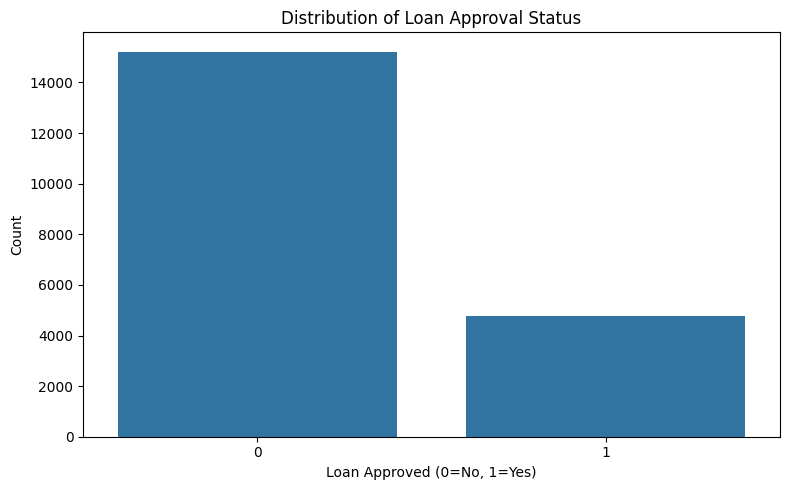

In [49]:
# visualize the distribution of target variable 'LoanApproved' using barplot 
plt.figure(figsize=(8, 5))

# Create simple countplot
sns.countplot(x='LoanApproved', data=loan_data)

# Add title and labels
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Loan Approved (0=No, 1=Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
print(loan_data['LoanApproved'].value_counts(normalize=True))

Loan_Approved
0    0.761
1    0.239
Name: proportion, dtype: float64


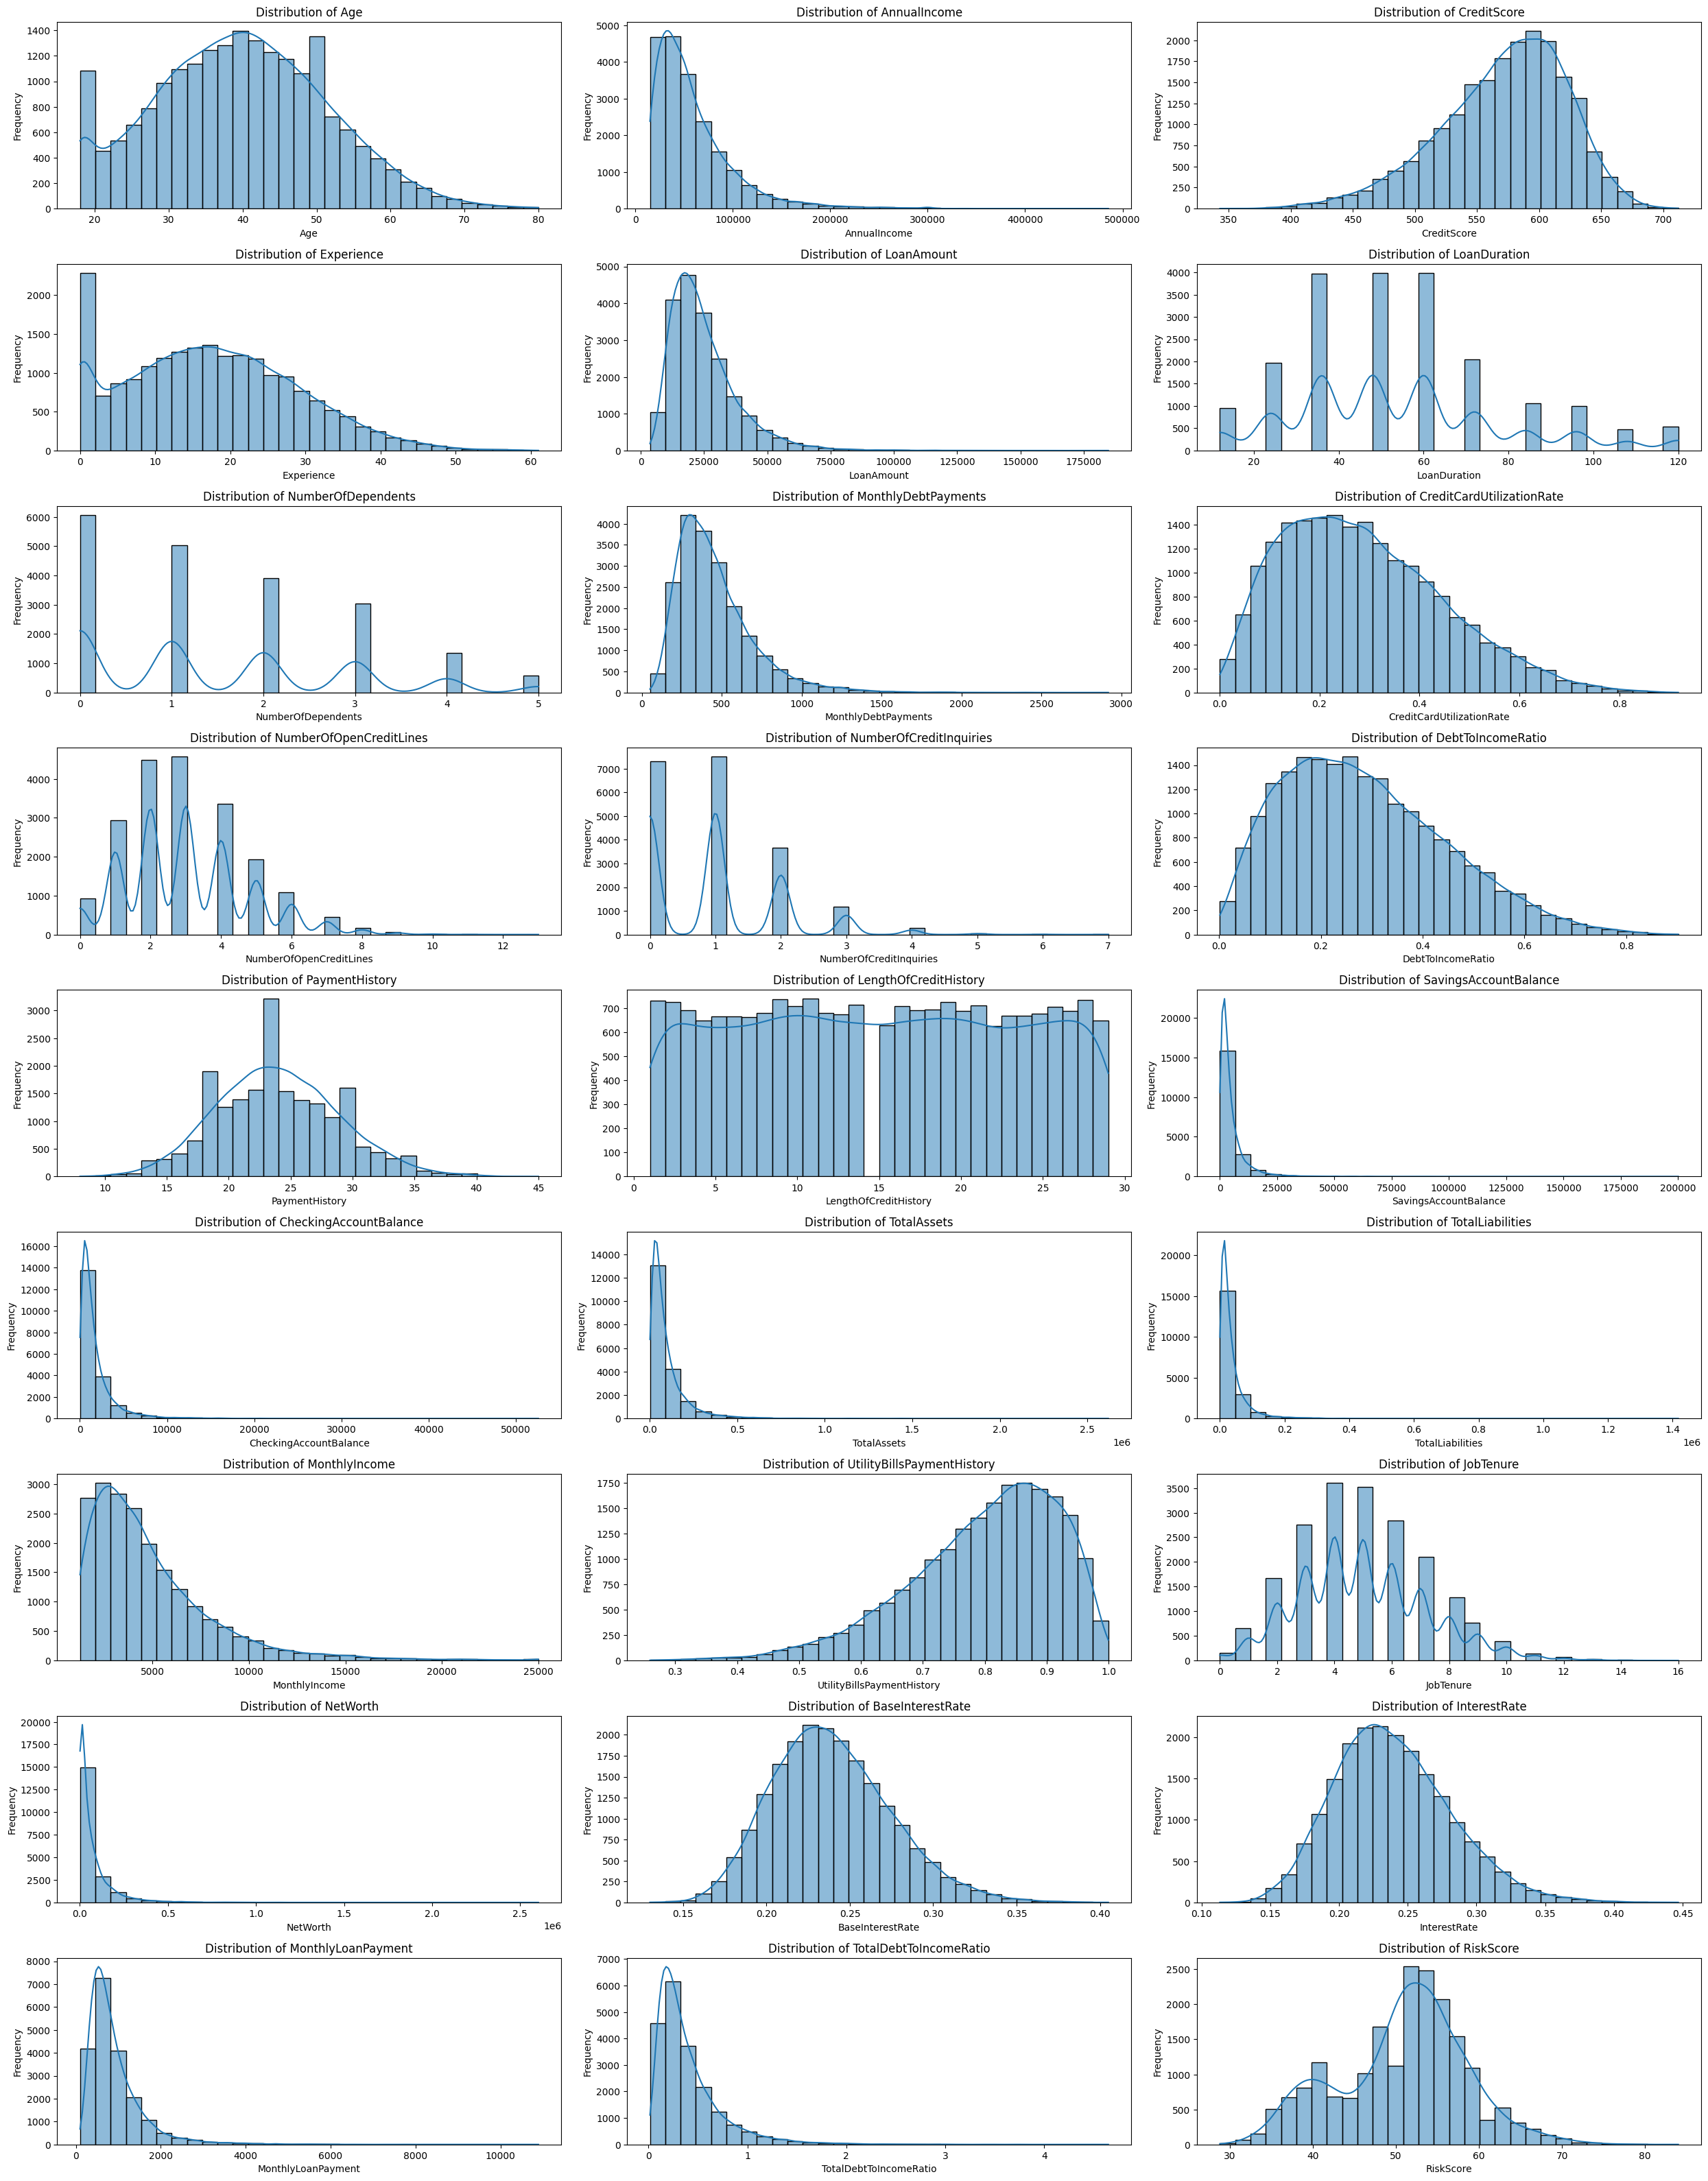

In [50]:
### visualize numerical input variables

# Set up the figure and subplots
plt.figure(figsize=(25, 35))  # Adjust the figure size as needed
num_columns = len(numerical_data.columns)
rows = (num_columns // 3) + 1  # Adjust the number of rows based on the number of columns

# Loop through each numerical column and plot its distribution
for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(rows, 3, i)  # Create a subplot for each column
    sns.histplot(numerical_data[column], kde=True, bins=30)  # Plot histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

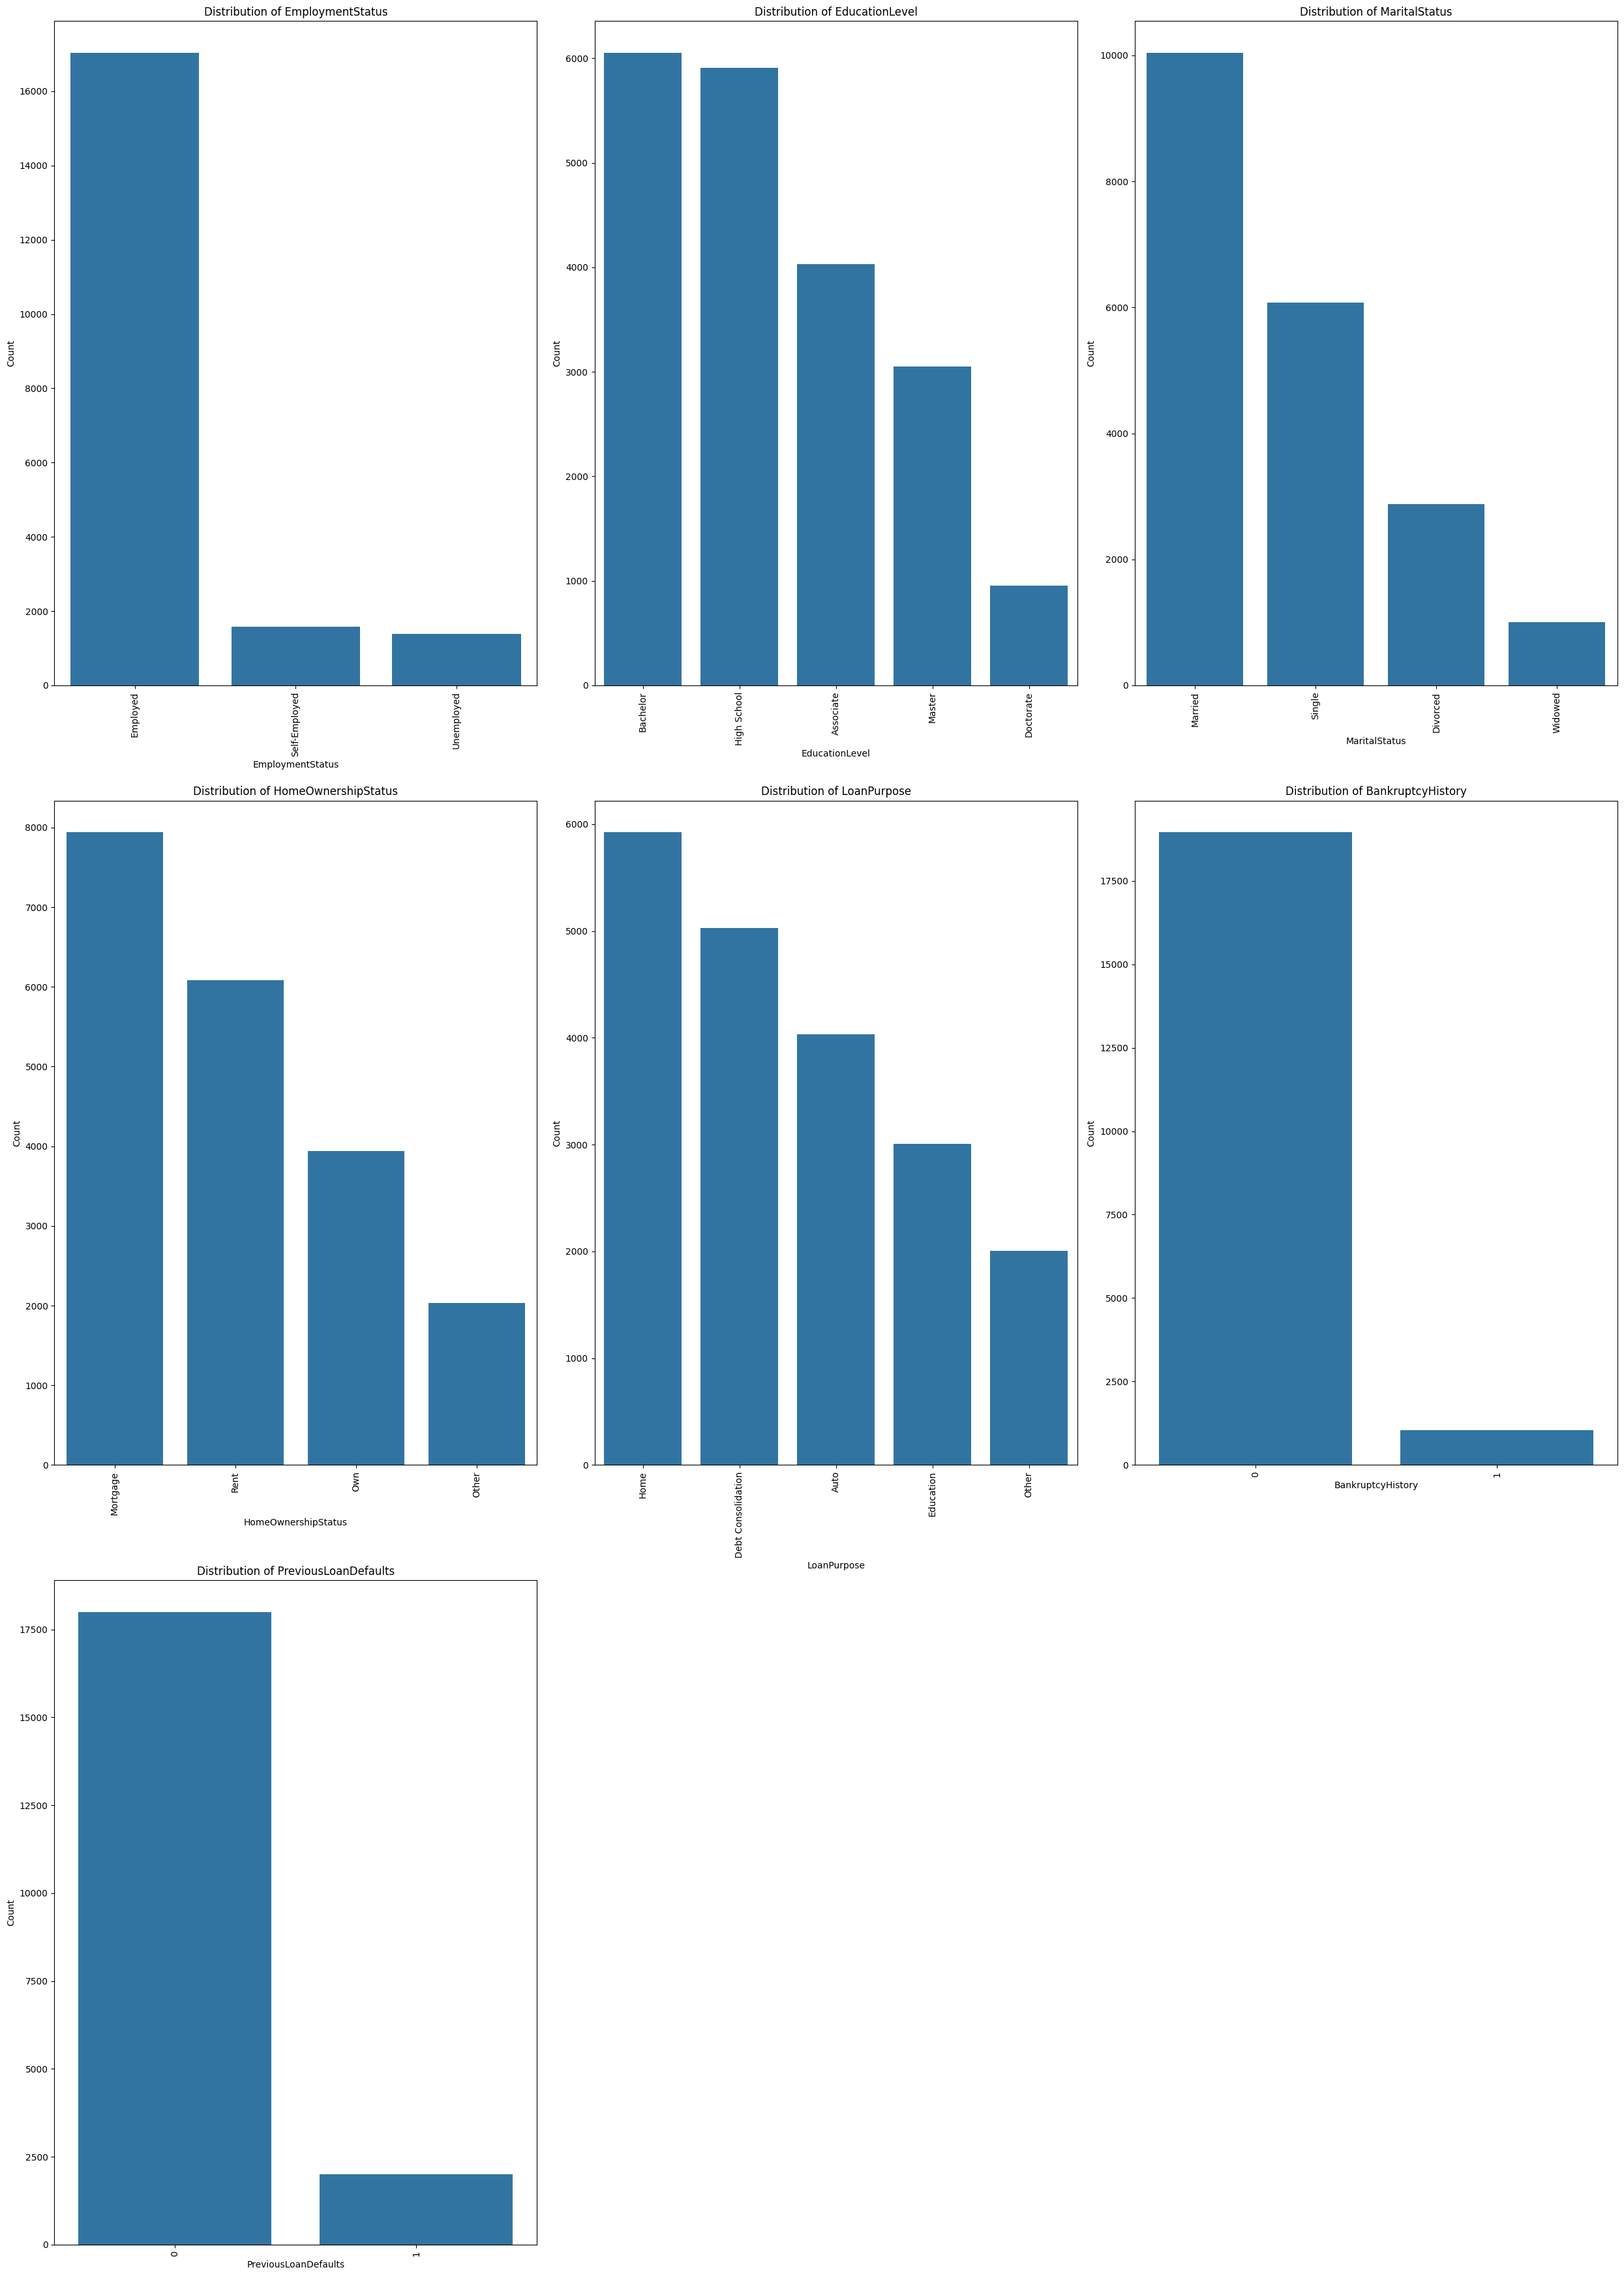

In [51]:
### visualize categorical input variables

#drop the target variable from the categorical data
categorical_data = categorical_data.drop(columns=['LoanApproved'])

plt.figure(figsize=(25, 35))  
num_columns = len(categorical_data.columns)
rows = (num_columns // 3) + 1  # Adjust the number of rows based on the number of columns

# Loop through each categorical column and plot its distribution
for i, column in enumerate(categorical_data.columns, 1):
    plt.subplot(rows, 3, i)  # Create a subplot for each column
    sns.countplot(x=categorical_data[column], order=categorical_data[column].value_counts().index)  # Plot bar plot
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

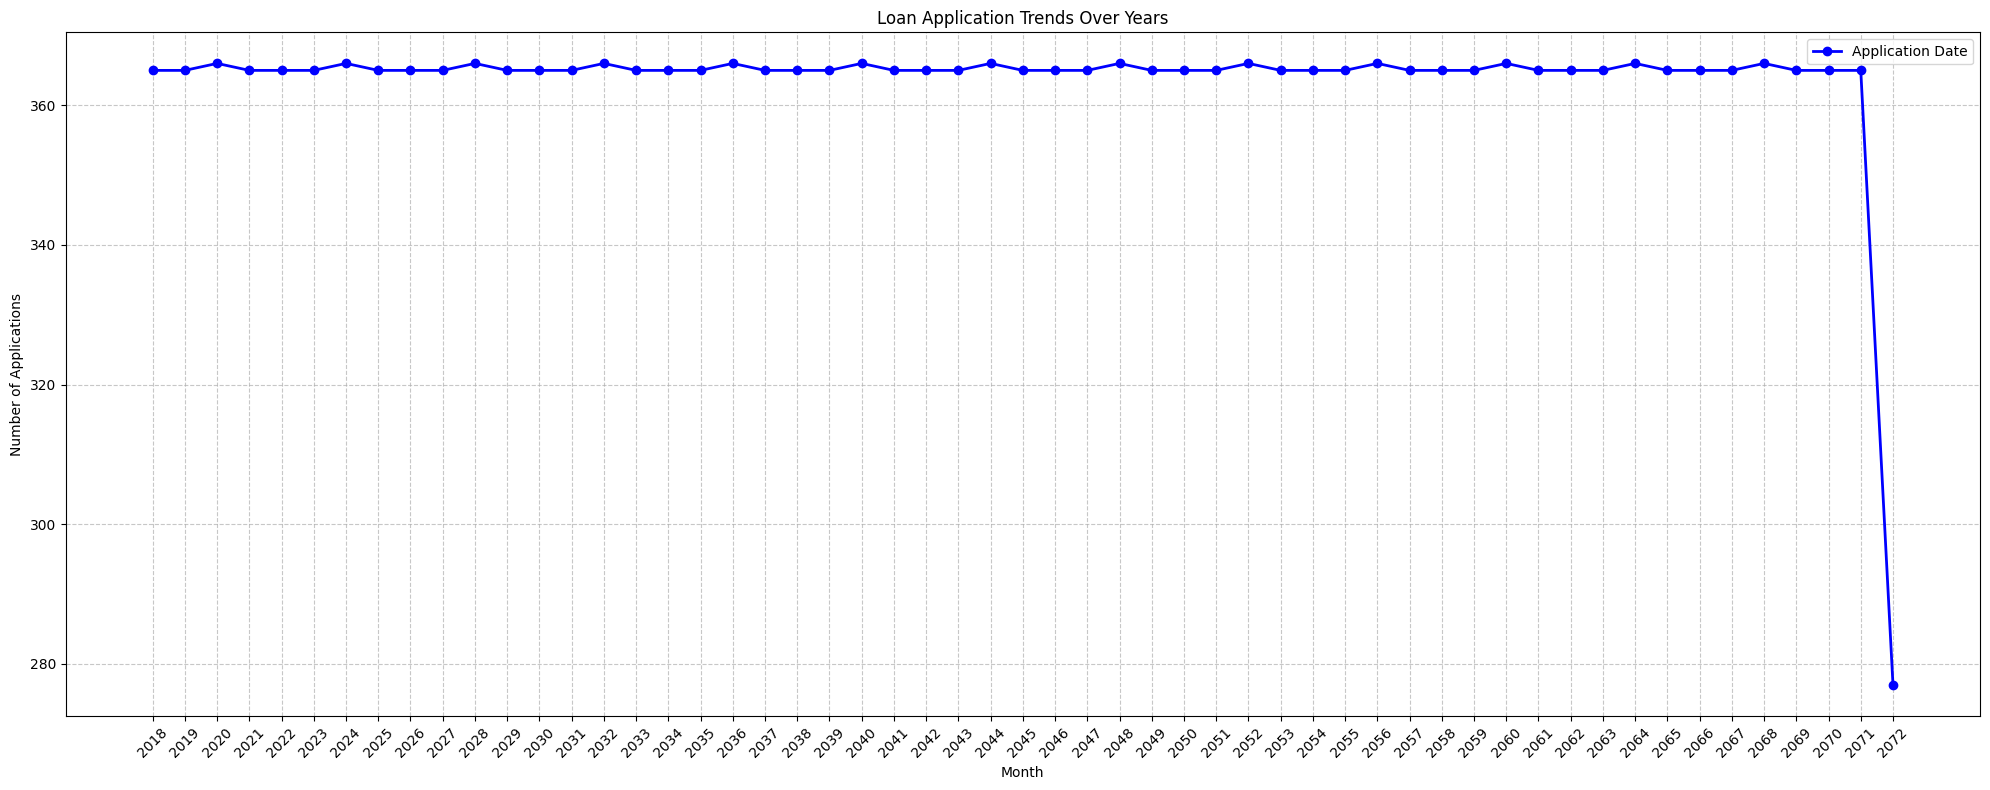

In [52]:
# Count number of applications per month
applications_by_year = loan_data.groupby(loan_data["ApplicationDate"].dt.to_period("Y")).size()

# Plot
plt.figure(figsize=(20, 8))
plt.plot(applications_by_year.index.astype(str), applications_by_year, 
         marker='o', linestyle='-', linewidth=2, color='blue', label="Application Date")

plt.xlabel("Month")
plt.ylabel("Number of Applications")
plt.title("Loan Application Trends Over Years")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Outlier Analysis

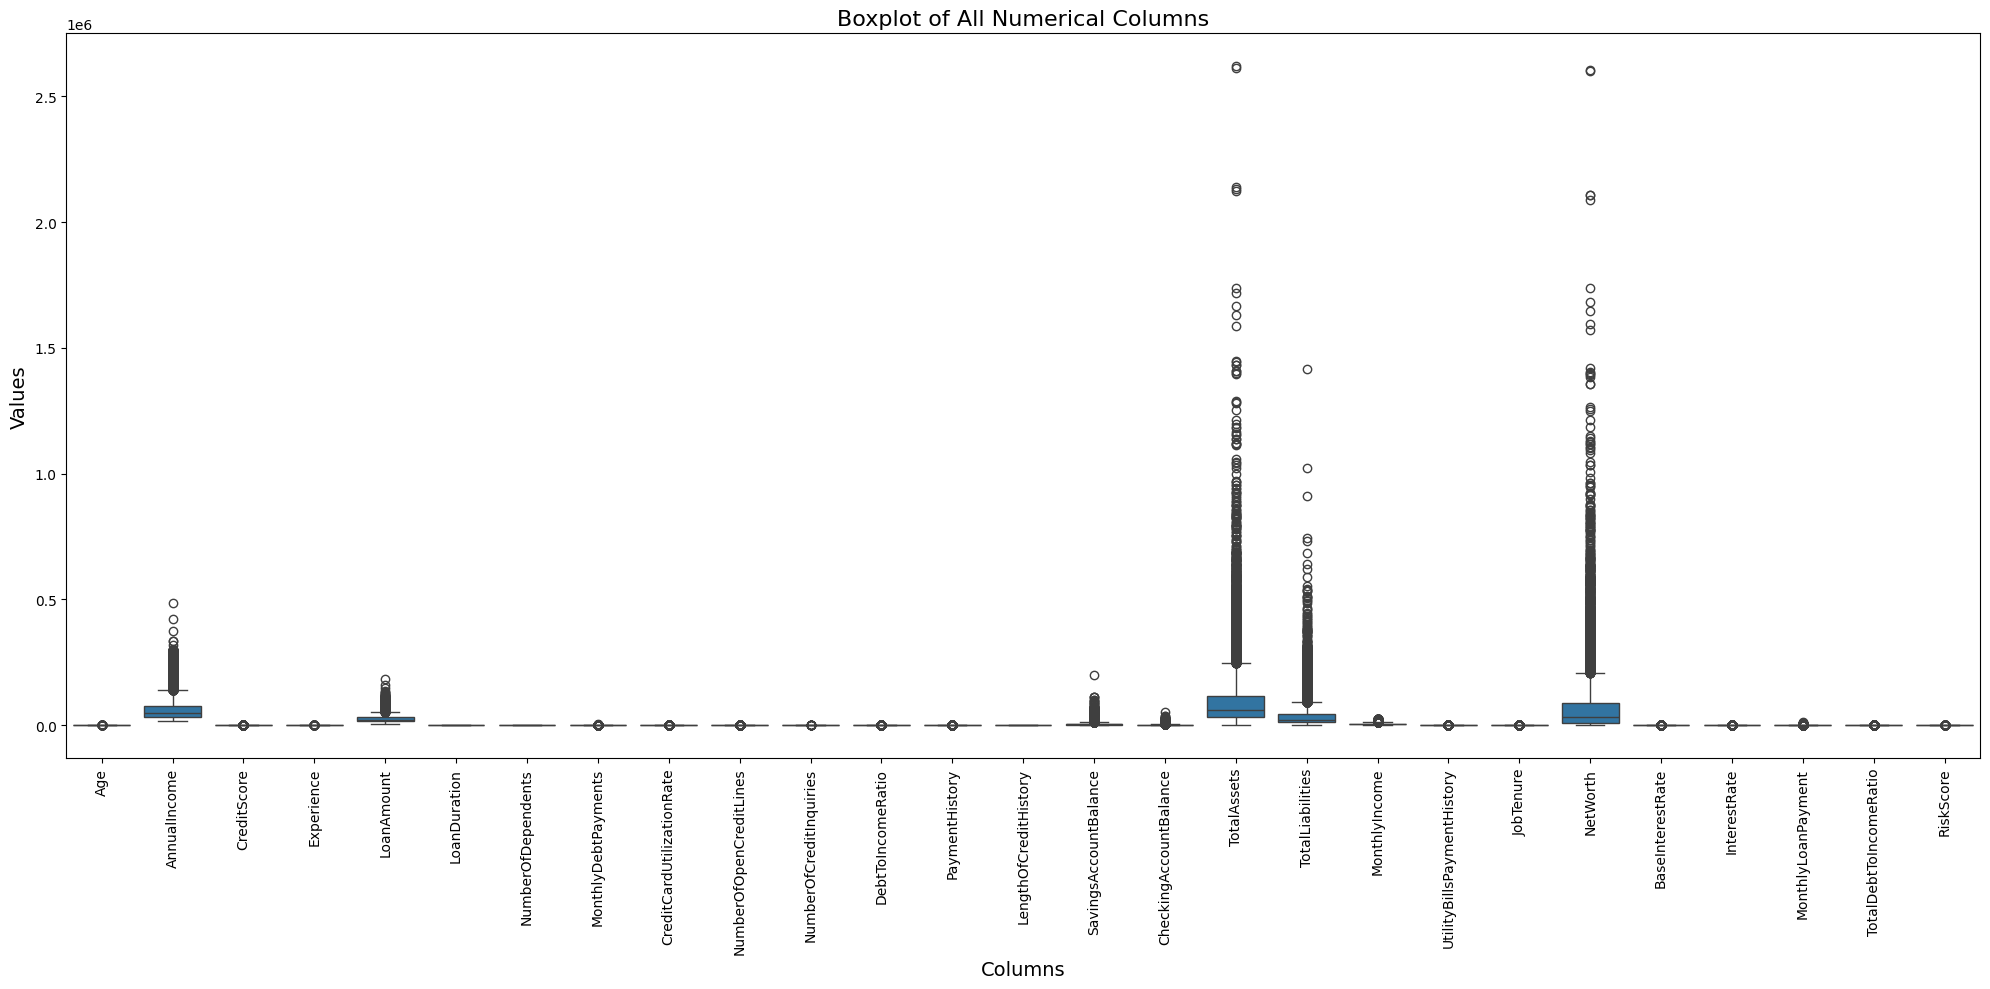

In [53]:
# visualize using boxplot

# Melt the DataFrame to long format for Seaborn
melted_data = numerical_data.melt(var_name='Columns', value_name='Values')

# Set up the figure
plt.figure(figsize=(20, 10))  # Adjust figure size for better readability

# Create a boxplot for all numerical columns
sns.boxplot(x='Columns', y='Values', data=melted_data)
plt.title('Boxplot of All Numerical Columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Data Preprocessing

### Normalize the column name

In [235]:
# print all the column name
loan_data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [236]:
def format_column_names(columns):

    formatted_columns = []
    
    for column in columns:           
        # Process CamelCase columns
        result = column[0]  # Keep the first character
        for i in range(1, len(column)):
            # If current character is uppercase and previous is lowercase
            # insert an underscore (detects word boundaries in CamelCase)
            if column[i].isupper() and column[i-1].islower():
                result += '_' + column[i]
            else:
                result += column[i]
        
        # Capitalize each word after splitting by underscore
        words = result.split('_')
        words = [word.capitalize() for word in words]
        formatted = '_'.join(words)
        
        formatted_columns.append(formatted)
    
    return formatted_columns

# Define your column names (sample from your data)
columns = loan_data.columns.tolist()

# Apply the function to normalize column names
formatted_columns = format_column_names(columns)

# Print before and after comparison for verification
print("Original vs Normalized column names:")
for original, formatted in zip(columns, formatted_columns):
    print(f"{original:35} -> {formatted}")

# Update your DataFrame with the normalized column names
loan_data.columns = formatted_columns

Original vs Normalized column names:
ApplicationDate                     -> Application_Date
Age                                 -> Age
AnnualIncome                        -> Annual_Income
CreditScore                         -> Credit_Score
EmploymentStatus                    -> Employment_Status
EducationLevel                      -> Education_Level
Experience                          -> Experience
LoanAmount                          -> Loan_Amount
LoanDuration                        -> Loan_Duration
MaritalStatus                       -> Marital_Status
NumberOfDependents                  -> Number_Of_Dependents
HomeOwnershipStatus                 -> Home_Ownership_Status
MonthlyDebtPayments                 -> Monthly_Debt_Payments
CreditCardUtilizationRate           -> Credit_Card_Utilization_Rate
NumberOfOpenCreditLines             -> Number_Of_Open_Credit_Lines
NumberOfCreditInquiries             -> Number_Of_Credit_Inquiries
DebtToIncomeRatio                   -> Debt_To_Income_Ra

In [237]:
loan_data.columns

Index(['Application_Date', 'Age', 'Annual_Income', 'Credit_Score',
       'Employment_Status', 'Education_Level', 'Experience', 'Loan_Amount',
       'Loan_Duration', 'Marital_Status', 'Number_Of_Dependents',
       'Home_Ownership_Status', 'Monthly_Debt_Payments',
       'Credit_Card_Utilization_Rate', 'Number_Of_Open_Credit_Lines',
       'Number_Of_Credit_Inquiries', 'Debt_To_Income_Ratio',
       'Bankruptcy_History', 'Loan_Purpose', 'Previous_Loan_Defaults',
       'Payment_History', 'Length_Of_Credit_History',
       'Savings_Account_Balance', 'Checking_Account_Balance', 'Total_Assets',
       'Total_Liabilities', 'Monthly_Income', 'Utility_Bills_Payment_History',
       'Job_Tenure', 'Net_Worth', 'Base_Interest_Rate', 'Interest_Rate',
       'Monthly_Loan_Payment', 'Total_Debt_To_Income_Ratio', 'Loan_Approved',
       'Risk_Score'],
      dtype='object')

### Drop Unecessary Columns

- Risk_Score is likely another target variable, including them in the model may lead to data leakage
- 'Base_Interest_Rate', 'Interest_Rate', and 'Monthly_Loan_Payment' are ususally determined only after the loan is underwritten

In [238]:
loan_data.drop(columns=['Application_Date'], inplace=True)
loan_data.drop(columns=['Risk_Score'], inplace=True)

In [239]:
loan_data.drop(columns= ['Base_Interest_Rate', 'Interest_Rate', 'Monthly_Loan_Payment'], inplace=True)

### Train-Test Split

In [240]:
# create dataframe x and y for train test split

x = loan_data.drop(columns=['Loan_Approved']) #select all features except target variable
y = loan_data['Loan_Approved'] #target variable

In [241]:
# perform train test split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [242]:
## Retrieve a clean dataset without Data Encoding (for CatBoost model)
unencoded_X_train = X_train
unencoded_X_test = X_test

### Feature Encoding

In [339]:
# Define the columns for encoding 

numerical_cols = ['Age', 'Annual_Income', 'Credit_Score', 'Experience', 'Loan_Amount', 'Loan_Duration', 'Number_Of_Dependents', 
                  'Monthly_Debt_Payments', 'Credit_Card_Utilization_Rate', 'Number_Of_Open_Credit_Lines', 'Number_Of_Credit_Inquiries', 
                  'Debt_To_Income_Ratio', 'Payment_History', 'Length_Of_Credit_History', 'Savings_Account_Balance', 
                  'Checking_Account_Balance', 'Total_Assets', 'Total_Liabilities', 'Monthly_Income', 'Utility_Bills_Payment_History', 
                  'Job_Tenure', 'Net_Worth', 'Total_Debt_To_Income_Ratio']
binary_cols = ['Bankruptcy_History', 'Previous_Loan_Defaults']
onehot_cols = ['Employment_Status', 'Marital_Status', 'Home_Ownership_Status', 'Loan_Purpose']
ordinal_cols = ['Education_Level']
target_col = ['Loan_Approved']

In [245]:
# print the unique data values in the train data for binary cols
for col in binary_cols:
    print(f"Unique values in {col}: {X_train[col].unique()}")

print("")

for col in onehot_cols:
    print(f"Unique values in {col}: {X_train[col].unique()}")

print("")

for col in ordinal_cols:
    print(f"Unique values in {col}: {X_train[col].unique()}")

Unique values in Bankruptcy_History: [0 1]
Unique values in Previous_Loan_Defaults: [0 1]

Unique values in Employment_Status: ['Employed' 'Unemployed' 'Self-Employed']
Unique values in Marital_Status: ['Married' 'Single' 'Widowed' 'Divorced']
Unique values in Home_Ownership_Status: ['Own' 'Rent' 'Mortgage' 'Other']
Unique values in Loan_Purpose: ['Debt Consolidation' 'Home' 'Auto' 'Education' 'Other']

Unique values in Education_Level: ['Associate' 'Master' 'High School' 'Bachelor' 'Doctorate']


#### One Hot Encoding

In [246]:
# One-Hot Encoding for train data categorical variables in onehot cols
onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_encoded_train_data = pd.DataFrame(onehot_encoder.fit_transform(X_train[onehot_cols]))
onehot_encoded_train_data.columns = onehot_encoder.get_feature_names_out(onehot_cols)
onehot_encoded_train_data.index = X_train.index
X_train = pd.concat([X_train, onehot_encoded_train_data], axis=1)
X_train.drop(columns=onehot_cols, inplace=True) # drop the original categorical columns after encoding
X_train.head(5) # check the first 5 rows of the train data

Age  Annual_Income  Credit_Score Education_Level  Experience  \
5894   45          15000           620       Associate          21   
3728   25          49855           486          Master           3   
8958   51          38932           576          Master          30   
7671   18          58116           516     High School           0   
5999   25          62939           562        Bachelor           3   

      Loan_Amount  Loan_Duration  Number_Of_Dependents  Monthly_Debt_Payments  \
5894        17419             36                     3                    519   
3728        18998             48                     5                    404   
8958        17844             72                     1                    491   
7671        24050             60                     0                    831   
5999        27263             36                     0                    766   

      Credit_Card_Utilization_Rate  Number_Of_Open_Credit_Lines  \
5894                      0.368528                            3   
3728                      0.148286                            2   
8958                      0.411293                            1   
7671                      0.141719                            3   
5999                      0.232934                            3   

      Number_Of_Credit_Inquiries  Debt_To_Income_Ratio  Bankruptcy_History  \
5894                           2              0.297167                   0   
3728                           0              0.762549                   0   
8958                           0              0.128680                   0   
7671                           0              0.308723                   0   
5999                           1              0.465777                   0   

      Previous_Loan_Defaults  Payment_History  Length_Of_Credit_History  \
5894                       0               20                        20   
3728                       0               23                         4   
8958                       0               17                        21   
7671                       0               24                        25   
5999                       1               19                        14   

      Savings_Account_Balance  Checking_Account_Balance  Total_Assets  \
5894                     2601                       455         72122   
3728                     2841                      2102         62488   
8958                     3383                      2035         32491   
7671                     9175                       285        112872   
5999                     5036                       132        190687   

      Total_Liabilities  Monthly_Income  Utility_Bills_Payment_History  \
5894              12405     1250.000000                       0.832612   
3728              68894     4154.583333                       0.510667   
8958              65273     3244.333333                       0.835804   
7671              59908     4843.000000                       0.851177   
5999               1509     5244.916667                       0.587644   

      Job_Tenure  Net_Worth  Total_Debt_To_Income_Ratio  \
5894           7      59717                    0.932622   
3728           4       4711                    0.256035   
8958           4       2228                    0.299648   
7671           4      52964                    0.318753   
5999           3     189178                    0.335275   

      Employment_Status_Employed  Employment_Status_Self-Employed  \
5894                         1.0                              0.0   
3728                         1.0                              0.0   
8958                         1.0                              0.0   
7671                         0.0                              0.0   
5999                         1.0                              0.0   

      Employment_Status_Unemployed  Marital_Status_Divorced  \
5894                           0.0                      0.

In [247]:
### One-Hot Encoding for test data 
onehot_encoded_test_data = pd.DataFrame(onehot_encoder.transform(X_test[onehot_cols]))
onehot_encoded_test_data.columns = onehot_encoder.get_feature_names_out(onehot_cols)
onehot_encoded_test_data.index = X_test.index
X_test = pd.concat([X_test, onehot_encoded_test_data], axis=1)
X_test.drop(columns=onehot_cols, inplace=True) # drop the original categorical columns after encoding
X_test.head(5) # check the first 5 rows of the test data

Age  Annual_Income  Credit_Score Education_Level  Experience  \
10650   37         100761           604     High School          16   
2041    35         189154           509     High School          11   
8668    44          73272           483     High School          20   
1114    41          57115           412          Master          20   
13902   39          61155           551          Master          19   

       Loan_Amount  Loan_Duration  Number_Of_Dependents  \
10650        28479             84                     0   
2041         11222             60                     2   
8668         31573             48                     0   
1114         21937             12                     3   
13902        31510             48                     0   

       Monthly_Debt_Payments  Credit_Card_Utilization_Rate  \
10650                     88                      0.280949   
2041                     411                      0.289522   
8668                     442                      0.513947   
1114                     409                      0.256789   
13902                    533                      0.216696   

       Number_Of_Open_Credit_Lines  Number_Of_Credit_Inquiries  \
10650                            3                           1   
2041                             2                           4   
8668                             4                           1   
1114                             1                           1   
13902                            6                           1   

       Debt_To_Income_Ratio  Bankruptcy_History  Previous_Loan_Defaults  \
10650              0.430751                   0                       0   
2041               0.148908                   0                       0   
8668               0.206626                   0                       0   
1114               0.184681                   0                       0   
13902              0.184185                   0                       0   

       Payment_History  Length_Of_Credit_History  Savings_Account_Balance  \
10650               23                        19                     2254   
2041                30                        12                     4456   
8668                21                        25                     5212   
1114                23                        14                     5046   
13902               19                         3                     9010   

       Checking_Account_Balance  Total_Assets  Total_Liabilities  \
10650                      1421         10213               2909   
2041                       3706         42599              20156   
8668                       1619         75175              55131   
1114                       1389          6435              40497   
13902                      2117         72697              16756   

       Monthly_Income  Utility_Bills_Payment_History  Job_Tenure  Net_Worth  \
10650     8396.750000                       0.809983           7       7304   
2041     15762.833333                       0.831507           7      22443   
8668      6106.000000                       0.800830           1      20044   
1114      4759.583333                       0.954407           5       1714   
13902     5096.250000                       0.840267           3      55941   

       Total_Debt_To_Income_Ratio  Employment_Status_Employed  \
10650                    0.090436                         1.0   
2041                     0.047832                         1.0   
8668                     0.271436                         1.0   
1114                     0.530868                         1.0   
13902                    0.309877                         1.0   

       Employment_Status_Self-Employed  Employment_Status_Unemployed  \
10650                              0.0                           0.0   
2041                               0.0                           0.0   
8668                               0.0            

#### Ordinal Encoding

In [248]:
# Define education level ordering (from lowest to highest)
education_categories = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

# Create category orderings dictionary
category_orders = {'Education_Level': education_categories}

# Create the ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=[category_orders['Education_Level']])

# Directly replace original column values in train data with encoded values
X_train['Education_Level'] = ordinal_encoder.fit_transform(X_train[['Education_Level']])

# For test data
X_test['Education_Level'] = ordinal_encoder.transform(X_test[['Education_Level']])

### Correlation Analysis

In [249]:
# create a train data and test data which combine X and y
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

<Axes: >

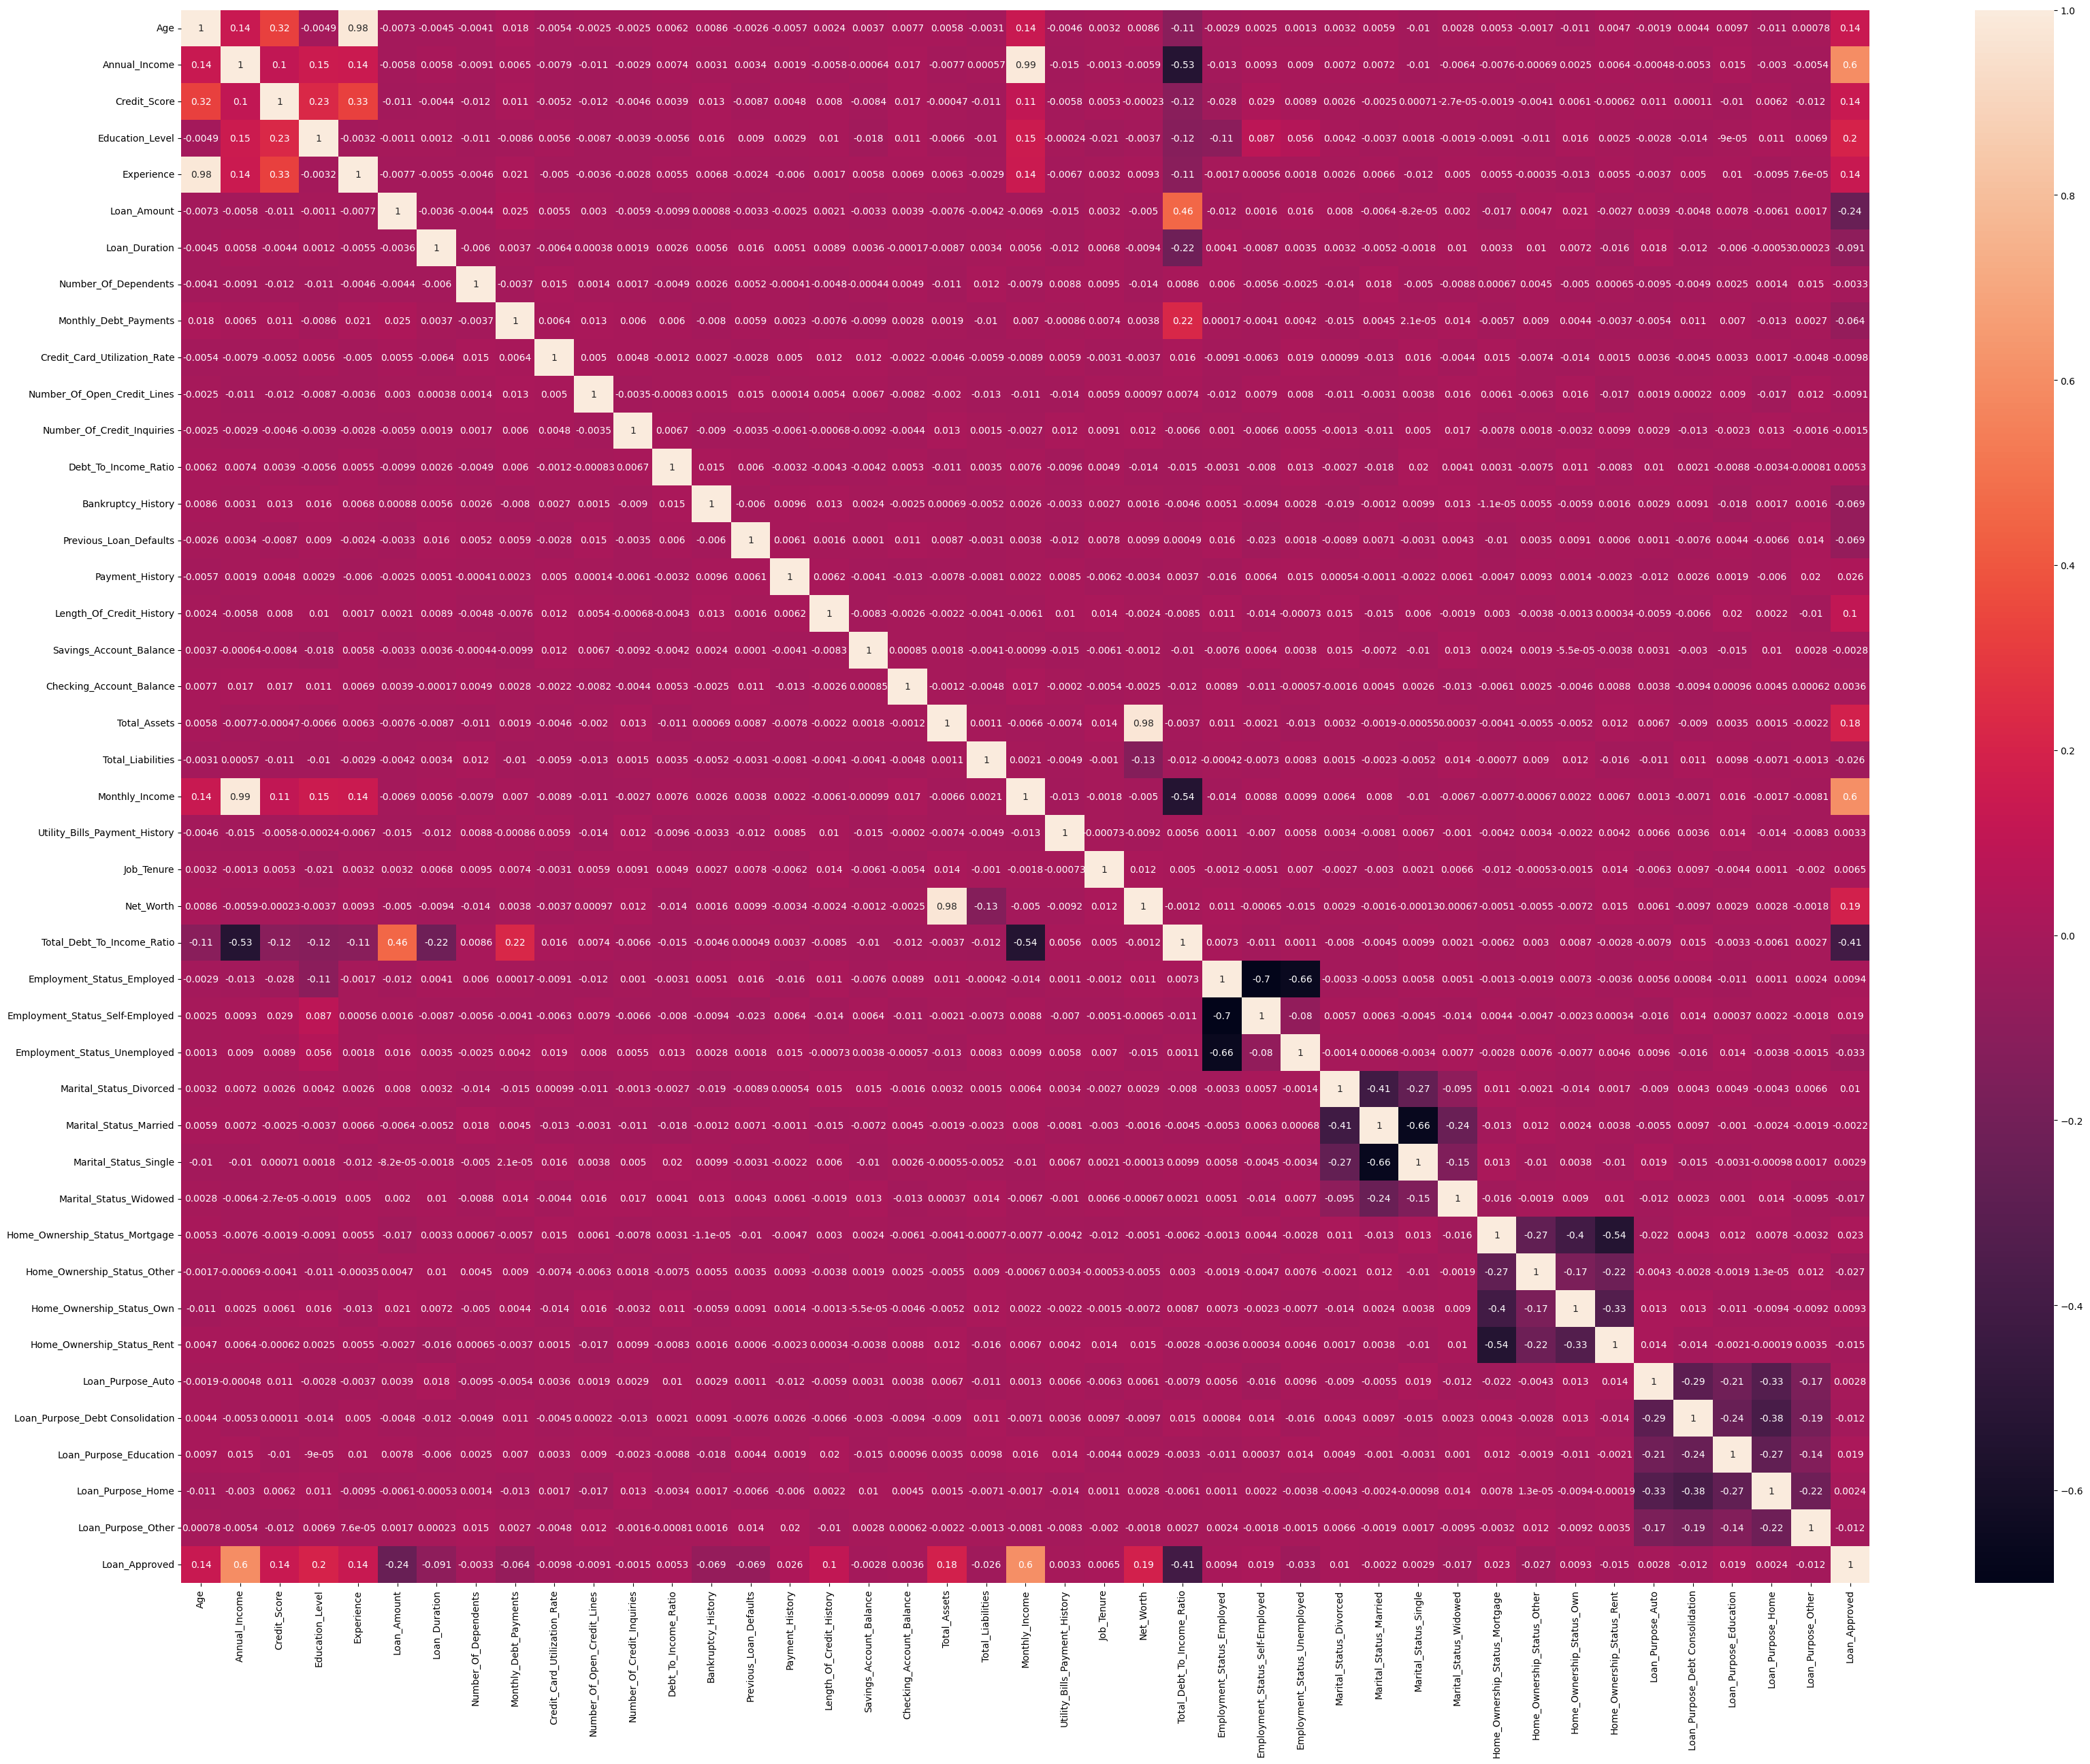

In [250]:
# Compute the correlation matrix
cor_matrix = train_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(40, 30))
sns.heatmap(cor_matrix, annot=True)

In [251]:
# Define correlation threshold 
threshold = 0.8

# Create empty set to collect highly correlated features
highly_correlated_features = set()

# Find and print pairs of highly correlated features
print(f"Feature pairs with correlation > {threshold}:")
print("-" * 60)

# Track the pairs we've already seen to avoid duplicates
seen_pairs = set()

for i in range(len(cor_matrix.columns)):
    for j in range(len(cor_matrix.columns)):
        # Skip diagonal (self-correlations) and duplicates
        if i == j or (j, i) in seen_pairs:
            continue
            
        # Get correlation value
        corr_value = cor_matrix.iloc[i, j]
        
        # Check if correlation exceeds threshold
        if abs(corr_value) > threshold:
            # Get column names
            col_i = cor_matrix.columns[i]
            col_j = cor_matrix.columns[j]
            
            # Add to highly correlated features set
            highly_correlated_features.add(col_i)
            highly_correlated_features.add(col_j)
            
            # Add to seen pairs
            seen_pairs.add((i, j))
            
            # Print the pair and correlation value
            print(f"{col_i:30} | {col_j:30} | {corr_value:.4f}")

print("\nSummary of highly correlated features:")
print("-" * 60)
for feature in sorted(highly_correlated_features):
    print(f"- {feature}")

print(f"\nTotal number of highly correlated features: {len(highly_correlated_features)}")

Feature pairs with correlation > 0.8:
------------------------------------------------------------
Age                            | Experience                     | 0.9830
Annual_Income                  | Monthly_Income                 | 0.9896
Total_Assets                   | Net_Worth                      | 0.9776

Summary of highly correlated features:
------------------------------------------------------------
- Age
- Annual_Income
- Experience
- Monthly_Income
- Net_Worth
- Total_Assets

Total number of highly correlated features: 6


In [252]:
# Identify Features with High Correlation

# Target variable name
target = 'Loan_Approved'

# Define a threshold for high correlation
threshold = 0.05

# Select features with high correlation (positive or negative)
high_corr_features = cor_matrix[target][(cor_matrix[target].abs() > threshold)]

# Remove the target variable itself if it appears in results
if target in high_corr_features.index:
    high_corr_features = high_corr_features.drop(target)

# Sort by absolute correlation values (highest to lowest)
high_corr_features = high_corr_features.sort_values(key=abs, ascending=False)

print("Features with high correlation to the target variable (sorted by strength):")
print(high_corr_features)

Features with high correlation to the target variable (sorted by strength):
Monthly_Income                0.603487
Annual_Income                 0.597511
Total_Debt_To_Income_Ratio   -0.406408
Loan_Amount                  -0.241790
Education_Level               0.198786
Net_Worth                     0.189483
Total_Assets                  0.184480
Credit_Score                  0.139692
Age                           0.137580
Experience                    0.136793
Length_Of_Credit_History      0.104183
Loan_Duration                -0.090832
Previous_Loan_Defaults       -0.068831
Bankruptcy_History           -0.068698
Monthly_Debt_Payments        -0.064010
Name: Loan_Approved, dtype: float64


### Feature Importance 

In [253]:
# train a tree-based algorithm (random forest regressor) to calculate feature importance.
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [254]:
# get the feature importance scores from the trained model
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': rf_regressor.feature_importances_}).sort_values(by='Importance', ascending=False)

Text(0.5, 1.0, 'Top 20 Important Features')

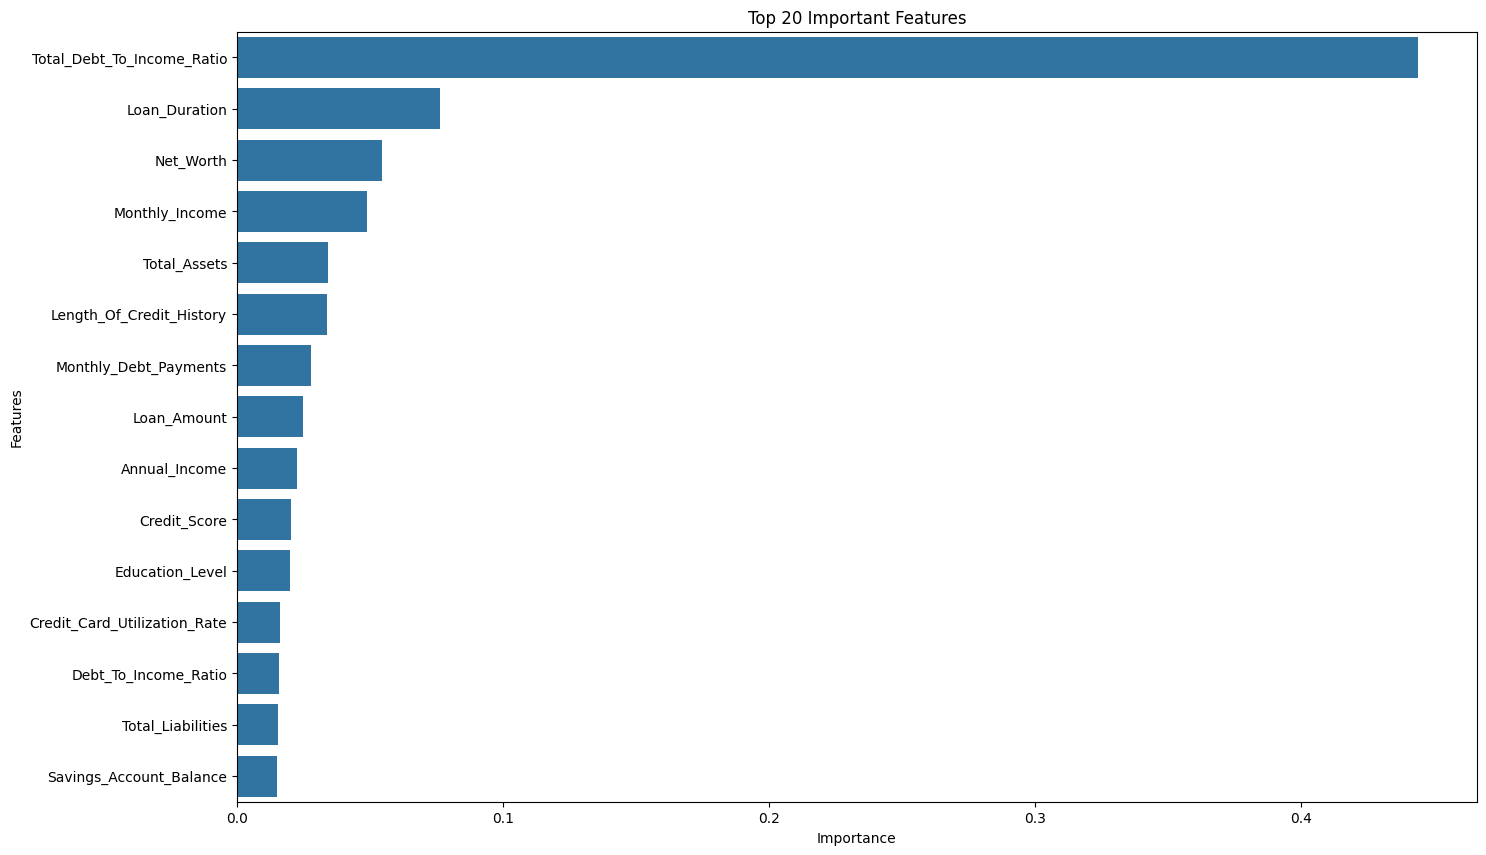

In [255]:
# visualize the importance by plotting the top features
plt.figure(figsize=(16, 10))
sns.barplot(x='Importance', y='Features', data=feature_importance.head(15))
plt.title('Top 20 Important Features')

In [256]:
# get the top 20 features
top_features = feature_importance['Features'][:15].values
# print the top features line by line
for feature in top_features:
    print(feature)

Total_Debt_To_Income_Ratio
Loan_Duration
Net_Worth
Monthly_Income
Total_Assets
Length_Of_Credit_History
Monthly_Debt_Payments
Loan_Amount
Annual_Income
Credit_Score
Education_Level
Credit_Card_Utilization_Rate
Debt_To_Income_Ratio
Total_Liabilities
Savings_Account_Balance


In [257]:
"""
# Apply Recursive Feature Elimination (RFE) to select the top 20 features
rfe = RFE(rf_regressor, n_features_to_select=20)
rfe.fit(X_train, y_train)

# Get selected feature names
selected_features = x.columns[rfe.support_]
selected_features
"""

'\n# Apply Recursive Feature Elimination (RFE) to select the top 20 features\nrfe = RFE(rf_regressor, n_features_to_select=20)\nrfe.fit(X_train, y_train)\n\n# Get selected feature names\nselected_features = x.columns[rfe.support_]\nselected_features\n'

### Feature Scaling

In [218]:
# Columns that need scaling - features with large or moderate value ranges
need_scaling = [
    # Features with large value ranges
    'Annual_Income',
    'Credit_Score',
    'Loan_Amount',
    'Savings_Account_Balance',
    'Total_Assets',
    'Total_Liabilities',
    'Net_Worth',
    'Monthly_Income',
    # Features with moderate value ranges
    'Age',
    'Experience',
    'Loan_Duration',
    'Monthly_Debt_Payments',
    'Number_Of_Open_Credit_Lines',
    'Number_Of_Credit_Inquiries',
    'Payment_History',
    'Length_Of_Credit_History',
    'Checking_Account_Balance',
    'Job_Tenure',
]

In [219]:
# create new dataframes and scale the features in the need scaling list
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled[need_scaling] = scaler.fit_transform(X_train[need_scaling])
# Transform the test data using the same scaler
X_test_scaled[need_scaling] = scaler.transform(X_test[need_scaling])

# Model Training

### Logistic Regression

In [301]:
lr = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', class_weight='balanced')

lr.fit(X_train_scaled, y_train)

lr_y_pred = lr.predict(X_test_scaled)

### MLP Classifier

In [259]:
# train a mlp classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=42)

# train the model
mlp.fit(X_train_scaled, y_train)

# make predictions
mlp_y_pred = mlp.predict(X_test_scaled)

### Decision Tree

In [260]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

### Random Forest

In [261]:
# train a random forest classifier model
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

In [262]:
"""
{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 426}
"""

"\n{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 426}\n"

### XGBoost

In [263]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

xgb.fit(X_train, y_train)

xgb_y_pred = xgb.predict(X_test)

### LightGB

In [264]:
# train a lightgbm classifier model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_y_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3763, number of negative: 12237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3848
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.235187 -> initscore=-1.179248
[LightGBM] [Info] Start training from score -1.179248


### CatBoost

In [265]:
# train a catboost classifier model
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
catboost.fit(X_train, y_train)
catboost_y_pred = catboost.predict(X_test)

### Adaboost

In [266]:
# adaboost classifier model
ada = AdaBoostClassifier(estimator=rf, n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)

### Voting Classifier

In [267]:
vc = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('catboost', catboost)
    ],
    voting='soft'
)

vc.fit(X_train, y_train)
vc_y_pred = vc.predict(X_test)

c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3763, number of negative: 12237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3848
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.235187 -> initscore=-1.179248
[LightGBM] [Info] Start training from score -1.179248


### Stacked Classifier

In [268]:
# train a tree stacked model
stacked_model = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('catboost', catboost)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_model_y_pred = stacked_model.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3763, number of negative: 12237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3848
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.235187 -> initscore=-1.179248
[LightGBM] [Info] Start training from score -1.179248
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3011, number of negative: 9789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3843
[LightGBM] [Info] Number of data points in the train set: 12800, number of used fe

### deep learning model

In [269]:
# train a deep learning model for loan approval prediction
def create_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    return model

# Create the model
input_shape = (X_train.shape[1],)
model = create_model(input_shape)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
# Make predictions
dnn_y_pred = model.predict(X_test)
dnn_y_pred = (dnn_y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6539 - loss: 775.0928 - val_accuracy: 0.7606 - val_loss: 0.5690
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6951 - loss: 20.5390 - val_accuracy: 0.7606 - val_loss: 0.5601
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7152 - loss: 8.0797 - val_accuracy: 0.7606 - val_loss: 0.5732
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7535 - loss: 2.5940 - val_accuracy: 0.7606 - val_loss: 0.5592
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7559 - loss: 3.5525 - val_accuracy: 0.7606 - val_loss: 0.5530
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7662 - loss: 0.7906 - val_accuracy: 0.7606 - val_loss: 0.5509
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7634 - loss: 1.3769 - val_accuracy: 0.7606 - val_loss: 0.5504
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7644 - loss: 1.1820 - val_accuracy:

## Hyperparameter Tuning

In [270]:
# Define function for hyperparameter tuning using RandomizedSearchCV

def randomsearch_tune(model, param_dist, X_trainset, y_trainset):

    random_search = RandomizedSearchCV(
        estimator = model,
        param_distributions = param_dist,
        n_iter = 100,
        cv = 5, 
        scoring = "f1_weighted",
        n_jobs = -1,
        random_state = 42,
        verbose = 2
    )
    
    random_search.fit(X_trainset, y_trainset)
    
    return random_search.best_estimator_, random_search.best_params_

In [271]:
xgb_param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.5, 1, 2, 3, 5],
    'reg_alpha': [0, 0.5, 1, 1.5, 2],
    'reg_lambda': [0, 0.5, 1, 1.5, 2],
    'min_child_weight': [1, 3, 5, 7, 10]
}

# Perform RandomizedSearchCV
tuned_xgb, xgb_best_params = randomsearch_tune(xgb, xgb_param_dist, X_train, y_train)
print("Best Parameters for XGBoost Classifier:")
print(xgb_best_params)

# Make predictions
tunedxgb_y_pred = tuned_xgb.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for XGBoost Classifier:
{'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.6}


In [272]:
lgbm_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'num_leaves': [20, 31, 40, 50, 60, 70, 80],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.5, 1, 1.5, 2],
    'reg_lambda': [0, 0.5, 1, 1.5, 2],
    'min_child_weight': [1e-3, 0.1, 1, 3, 5, 10],
    'min_child_samples': [5, 10, 15, 20, 30, 40]
}

# Perform RandomizedSearchCV
tuned_lgbm, lgbm_best_params = randomsearch_tune(lgbm, lgbm_params, X_train, y_train)

print("Best Parameters for LightGBM Classifier:")
print(lgbm_best_params)

# Make predictions
tunedlgbm_y_pred = tuned_lgbm.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3763, number of negative: 12237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3848
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.235187 -> initscore=-1.179248
[LightGBM] [Info] Start training from score -1.179248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [273]:
cb = CatBoostClassifier(random_seed=42, verbose=0)

catboost_params= {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'grow_policy': ['SymmetricTree'],  # Simplify this choice
    'bootstrap_type': ['Bayesian', 'Bernoulli'],  # Important for imbalanced data
    'scale_pos_weight': [1, 3, 5],  # Add for imbalanced classification
    'task_type': ['CPU'],
    'one_hot_max_size': [10, 15],  # Important for categorical features
    'early_stopping_rounds': [50],
    'verbose': [0]
}

# Perform RandomizedSearchCV
tuned_catboost, catboost_best_params = randomsearch_tune(cb, catboost_params, X_train, y_train)

print("Best Parameters for CatBoost Classifier:")
print(catboost_best_params)

# Make predictions
tunedcatboost_y_pred = tuned_catboost.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
14 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None,

Best Parameters for CatBoost Classifier:
{'verbose': 0, 'task_type': 'CPU', 'scale_pos_weight': 1, 'one_hot_max_size': 15, 'n_estimators': 500, 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'grow_policy': 'SymmetricTree', 'early_stopping_rounds': 50, 'depth': 4, 'bootstrap_type': 'Bernoulli'}


In [274]:
# Random Forest Classifier
rf_params = {
    'n_estimators': randint(100, 501),             # Number of trees: 100-500
    'max_depth': randint(5, 21),                   # Tree depth: 5-20
    'min_samples_split': randint(2, 11),           # Min samples to split: 2-10
    'min_samples_leaf': randint(1, 11),            # Min samples per leaf: 1-10
    'max_features': ['auto', 'sqrt', 'log2'],      # Feature selection strategy
    'bootstrap': [True, False]                     # Bootstrap sampling
}

# Perform RandomizedSearchCV
tuned_rf, rf_best_params = randomsearch_tune(rf, rf_params, X_train, y_train)

print("Best Parameters for Random Forest Classifier:")
print(rf_best_params)

# Make predictions
tunedrf_y_pred = tuned_rf.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
170 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
116 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Benjamin Khor\OneDr

Best Parameters for Random Forest Classifier:
{'bootstrap': False, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 204}


In [275]:
# Decision Tree Classifier
dt_params = {
    'max_depth': randint(3, 21),                   # Tree depth: 3-20
    'min_samples_split': randint(2, 11),           # Min samples to split: 2-10
    'min_samples_leaf': randint(1, 11),            # Min samples per leaf: 1-10
    'max_features': ['auto', 'sqrt', 'log2', None],# Feature selection strategy
    'criterion': ['gini', 'entropy', 'log_loss']   # Split quality
}

# Perform RandomizedSearchCV
tuned_dt, dt_best_params = randomsearch_tune(dt, dt_params, X_train, y_train)

print("Best Parameters for Decision Tree Classifier:")
print(dt_best_params)

# Make predictions
tuneddt_y_pred = tuned_dt.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Benjamin Khor\OneDri

Best Parameters for Decision Tree Classifier:
{'criterion': 'log_loss', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [374]:
lr_params = {
    'C': uniform(0.01, 9.99),                      # Inverse regularization: 0.01-10
    'penalty': ['l2', 'l1', 'elasticnet', None],   # Regularization type
    'solver': ['lbfgs', 'liblinear', 'saga'],      # Solver (ensure compatible with penalty)
    'max_iter': [100, 200, 300, 500],              # Max iterations
    'fit_intercept': [True, False]
}

# Perform RandomizedSearchCV
tuned_lr, lr_best_params = randomsearch_tune(lr, lr_params, X_train, y_train)

print("Best Parameters for Logistic Regression:")
print(lr_best_params)

# Make predictions
tunedlr_y_pred = tuned_lr.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
220 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^

Best Parameters for Logistic Regression:
{'C': 9.977427445638929, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# train a tree stacked model
tuned_stacked_model = StackingClassifier(
    estimators=[
        ('rf', tuned_rf),
        ('xgb', tuned_xgb),
        ('lgbm', tuned_lgbm),
        ('catboost', tuned_catboost)
    ],
    final_estimator=tuned_lr,
    cv=5
)

tuned_stacked_model.fit(X_train, y_train)
tuned_stacked_model_y_pred = tuned_stacked_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3763, number of negative: 12237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3848
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.235187 -> initscore=-1.179248
[LightGBM] [Info] Start training from score -1.179248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

# Model Evaluation

### Perfomrance Analysis

In [377]:
# Create a list to store results of models
results = []

# Define a function to compute evaluation metrics for classification
def model_evaluation(model_name, y_true, y_pred, results):
    # Classification metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Calculate AUC-ROC if possible
    try:
        auc_value = roc_auc_score(y_true, y_pred)
    except:
        auc_value = None
    
    # Calculate confusion matrix and specificity
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    results.append({
        "Model": model_name, 
        "Accuracy": accuracy, 
        "Precision": precision, 
        "Recall": recall, 
        "F1": f1, 
        "AUC": auc_value,
    })

models = {
    "Logistic Regression" : lr_y_pred,
    "MLP Classifier" : mlp_y_pred,
    "Decision Tree Classifier" : dt_y_pred,
    "Random Forest Classifier" : rf_y_pred,
    "XGBoost Classifier" : xgb_y_pred,
    "LightGBM Classifier" : lgbm_y_pred,
    "CatBoost Classifier" : catboost_y_pred,
    "AdaBoostClassifier" : ada_y_pred,
    "Voting Classifier" : vc_y_pred,
    "Stacked Classifier" : stacked_model_y_pred,
    "Deep Learning Model" : dnn_y_pred,
    "Tuned Stacked Classifier": tuned_stacked_model_y_pred,
    "Tuned XGBoost Classifier" : tunedxgb_y_pred,
    "Tuned CatBoost Classifier" : tunedcatboost_y_pred,
    "Tuned LightGBM Classifier" : tunedlgbm_y_pred,
    "Tuned Random Forest Classifier" : tunedrf_y_pred,
    "Tuned Decision Tree Classifier" : tuneddt_y_pred,
    "Tuned Logistic Regression": tunedlr_y_pred
}

# Loop through models and evaluate
for model_name, y_pred in models.items():
    model_evaluation(model_name, y_test, y_pred, results)

# Convert results to DataFrame
results = pd.DataFrame(results)

# Display the table of the evaluation metrics for all table
results

c:\Users\Benjamin Khor\OneDrive - UWE Bristol\Credit-Scoring-System\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model  Accuracy  Precision    Recall        F1  \
0              Logistic Regression   0.91925   0.789167  0.931170  0.854308   
1                   MLP Classifier   0.90450   0.817183  0.804326  0.810704   
2         Decision Tree Classifier   0.86300   0.739042  0.712881  0.725726   
3         Random Forest Classifier   0.90550   0.871944  0.736480  0.798507   
4               XGBoost Classifier   0.92975   0.877049  0.841691  0.859007   
5              LightGBM Classifier   0.92950   0.880041  0.836775  0.857863   
6              CatBoost Classifier   0.93150   0.875632  0.851524  0.863410   
7               AdaBoostClassifier   0.90375   0.874408  0.725664  0.793122   
8                Voting Classifier   0.92950   0.887250  0.827925  0.856562   
9               Stacked Classifier   0.93150   0.895634  0.826942  0.859918   
10             Deep Learning Model   0.74575   0.000000  0.000000  0.000000   
11        Tuned Stacked Classifier   0.93525   0.894792  0.844641  0.868993   
12        Tuned XGBoost Classifier   0.93550   0.894081  0.846608  0.869697   
13       Tuned CatBoost Classifier   0.93425   0.893528  0.841691  0.866835   
14       Tuned LightGBM Classifier   0.93525   0.891529  0.848574  0.869521   
15  Tuned Random Forest Classifier   0.90800   0.873418  0.746313  0.804878   
16  Tuned Decision Tree Classifier   0.88850   0.795855  0.755162  0.774975   
17       Tuned Logistic Regression   0.92050   0.791493  0.933137  0.856498   

         AUC  
0   0.923178  
1   0.871489  
2   0.813531  
3   0.849802  
4   0.900732  
5   0.898944  
6   0.905145  
7   0.845065  
8   0.896028  
9   0.897045  
10  0.500000  
11  0.905391  
12  0.906207  
13  0.903749  
14  0.906687  
15  0.854719  
16  0.844561  
17  0.924664

In [378]:
# Sort models by F1 Score and select top 3
top_models = results.sort_values(by='F1', ascending=False).head(5)
top_models_filtered = top_models[['Model', 'F1', 'Accuracy', 'Precision', 'Recall']]

print("Top Models by F1 Score:")
print(top_models_filtered)

# Sort models by Accuracy and select top 3
top_models = results.sort_values(by='Accuracy', ascending=False).head(5)
top_models_filtered = top_models[['Model', 'Accuracy', 'F1', 'Precision', 'Recall']]

print("\nTop Models by Accuracy:")
print(top_models_filtered)

print("\nBest model overall:")
best_model = results.sort_values(by=['F1', 'Accuracy'], ascending=False).iloc[0]
print(f"- {best_model['Model']}")
print(f"- F1 Score: {best_model['F1']:.4f}")
print(f"- Accuracy: {best_model['Accuracy']:.4f}")
print(f"- Precision: {best_model['Precision']:.4f}")
print(f"- Recall: {best_model['Recall']:.4f}")

Top Models by F1 Score:
                        Model        F1  Accuracy  Precision    Recall
12   Tuned XGBoost Classifier  0.869697   0.93550   0.894081  0.846608
14  Tuned LightGBM Classifier  0.869521   0.93525   0.891529  0.848574
11   Tuned Stacked Classifier  0.868993   0.93525   0.894792  0.844641
13  Tuned CatBoost Classifier  0.866835   0.93425   0.893528  0.841691
6         CatBoost Classifier  0.863410   0.93150   0.875632  0.851524

Top Models by Accuracy:
                        Model  Accuracy        F1  Precision    Recall
12   Tuned XGBoost Classifier   0.93550  0.869697   0.894081  0.846608
11   Tuned Stacked Classifier   0.93525  0.868993   0.894792  0.844641
14  Tuned LightGBM Classifier   0.93525  0.869521   0.891529  0.848574
13  Tuned CatBoost Classifier   0.93425  0.866835   0.893528  0.841691
9          Stacked Classifier   0.93150  0.859918   0.895634  0.826942

Best model overall:
- Tuned XGBoost Classifier
- F1 Score: 0.8697
- Accuracy: 0.9355
- Precision: 

In [76]:
"""
# define the function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Loop through models and plot confusion matrix
for model_name, y_pred in models.items():
    plot_confusion_matrix(y_test, y_pred, model_name)
"""

"\n# define the function to plot the confusion matrix\ndef plot_confusion_matrix(y_true, y_pred, model_name):\n    cm = confusion_matrix(y_true, y_pred)\n    plt.figure(figsize=(8, 6))\n    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)\n    plt.title(f'Confusion Matrix for {model_name}')\n    plt.xlabel('Predicted')\n    plt.ylabel('True')\n    plt.show()\n\n# Loop through models and plot confusion matrix\nfor model_name, y_pred in models.items():\n    plot_confusion_matrix(y_test, y_pred, model_name)\n"

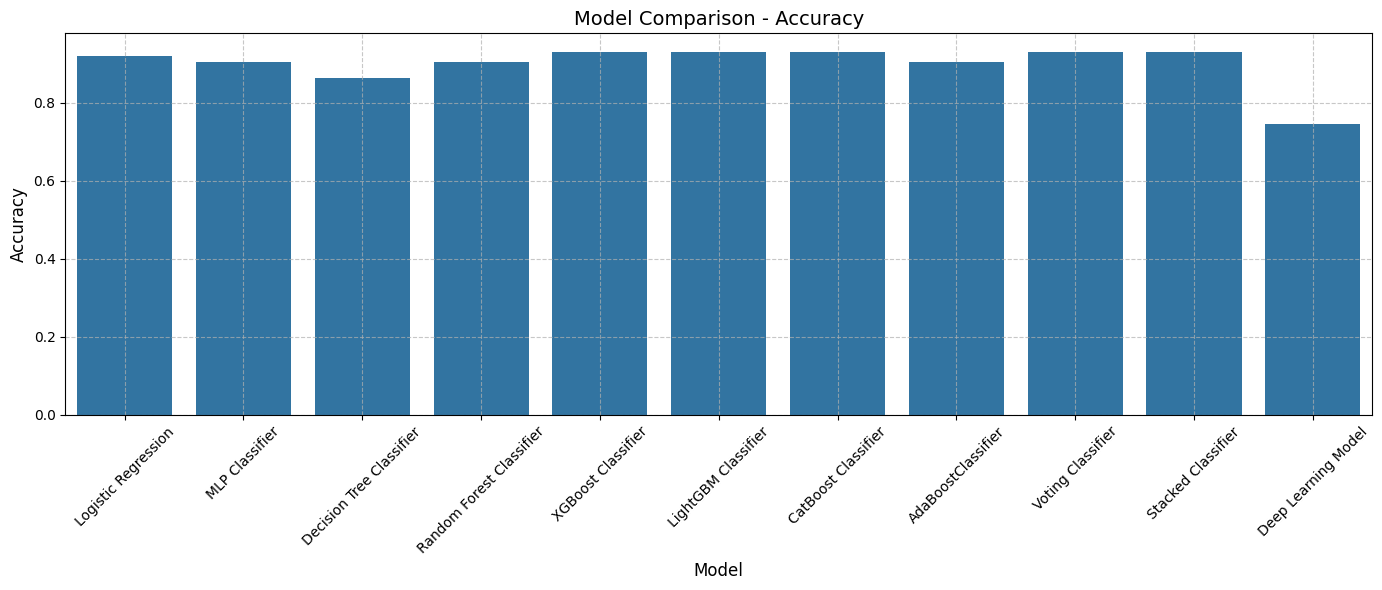

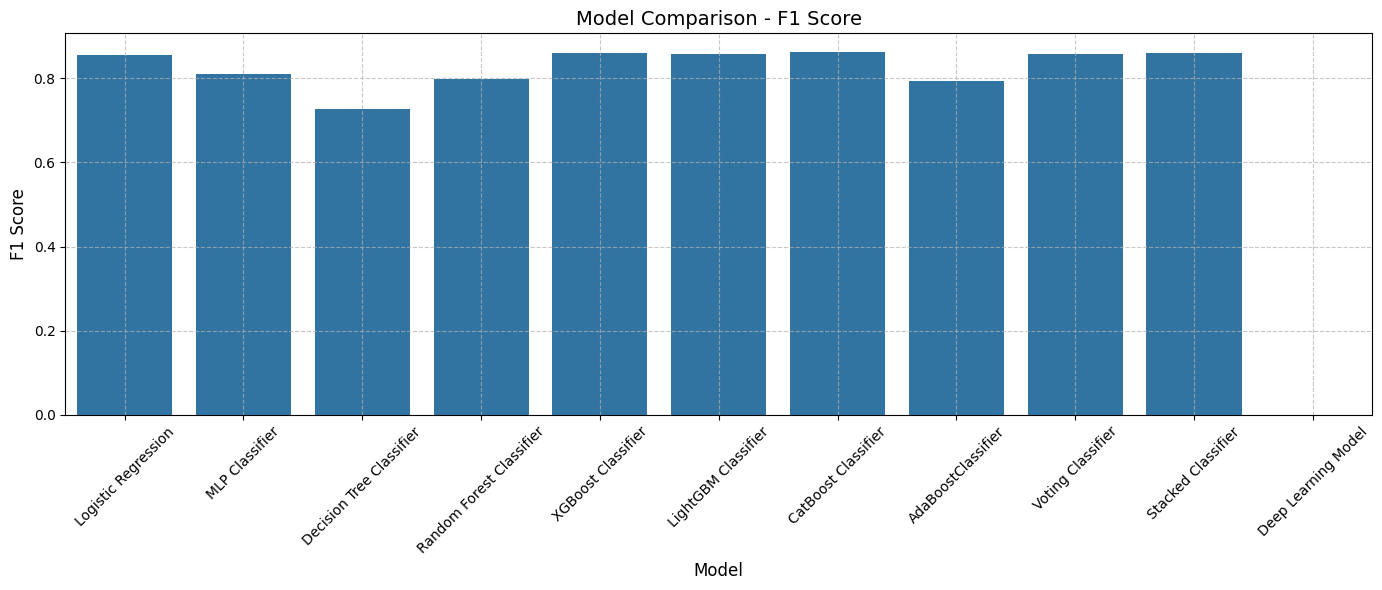

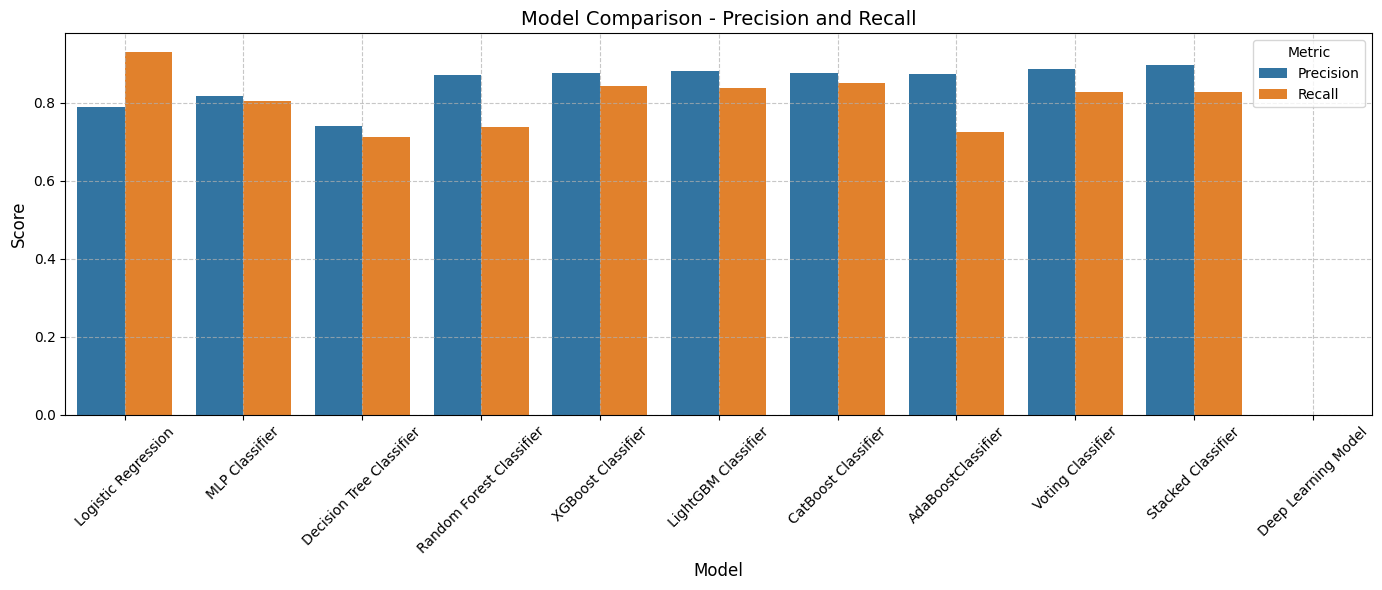

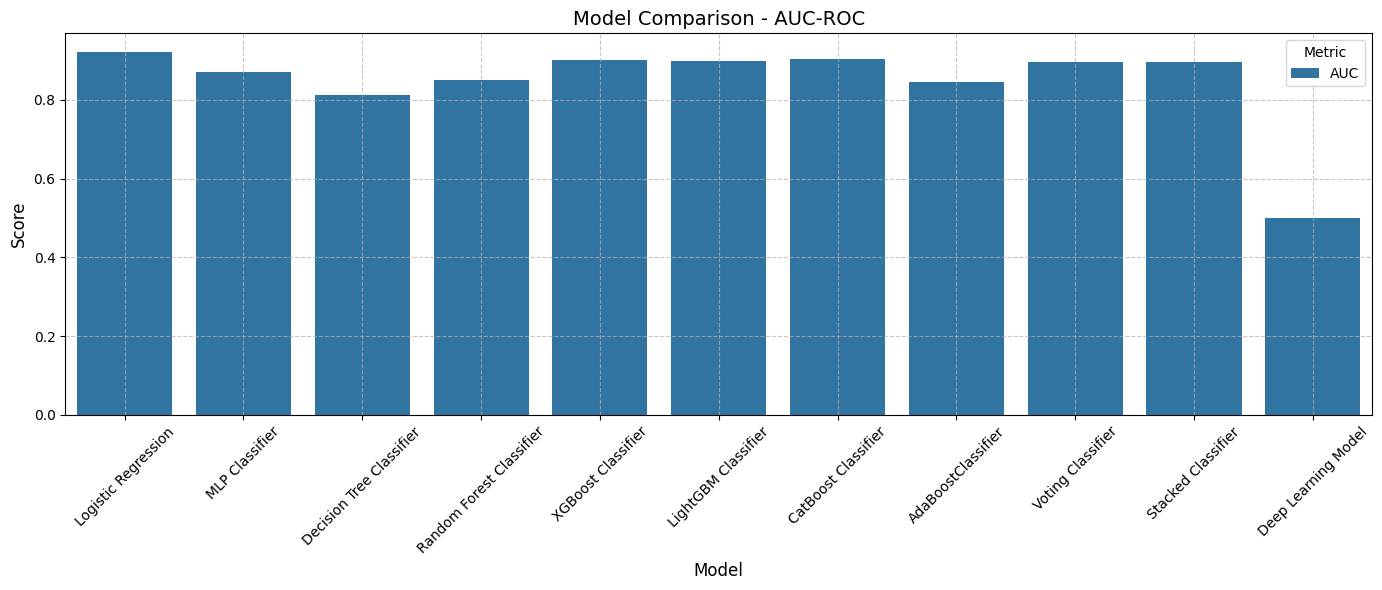

In [304]:
# Plot the Accuracy for each model
plt.figure(figsize=(14, 6))
sns.barplot(x="Model", y="Accuracy", data=results)

# Add title and labels
plt.title("Model Comparison - Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the F1 Score for each model
plt.figure(figsize=(14, 6))
sns.barplot(x="Model", y="F1", data=results)

# Add title and labels
plt.title("Model Comparison - F1 Score", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Precision and Recall together
plt.figure(figsize=(14, 6))
metrics_df = pd.melt(results, 
                    id_vars=['Model'],
                    value_vars=['Precision', 'Recall'],
                    var_name='Metric', 
                    value_name='Value')

sns.barplot(x="Model", y="Value", hue="Metric", data=metrics_df)
plt.title("Model Comparison - Precision and Recall", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot AUC-ROC and Specificity together
plt.figure(figsize=(14, 6))
metrics_df = pd.melt(results, 
                     id_vars=['Model'],
                     value_vars=['AUC'],
                     var_name='Metric', 
                     value_name='Value')

sns.barplot(x="Model", y="Value", hue="Metric", data=metrics_df)
plt.title("Model Comparison - AUC-ROC", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Metric')
plt.show()

### Cross Validation

In [288]:
# run 10 kfold cross validation for tuned xgb
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(tuned_xgb, X_train, y_train, cv=kf, scoring='f1_weighted')

In [ ]:
from sklearn.base import clone

def perform_kfold_cv(model, X, y, n_splits=10, random_state=42, print_results=True):

    # Initialize KFold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize list to store metrics for each fold
    fold_metrics = []
    
    # Perform k-fold cross-validation
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        # Split data for this fold
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Clone the model to ensure fresh instance for each fold
        model_clone = clone(model) if hasattr(model, 'fit') else model
        
        # Handle different types of models with different training requirements
        try:
            # Handle different model types with their specific verbosity parameters
            if isinstance(model, CatBoostClassifier):
                model_clone.fit(X_fold_train, y_fold_train, verbose=0)
            elif isinstance(model, XGBClassifier):
                model_clone.fit(X_fold_train, y_fold_train, verbose=0)
            elif isinstance(model, LGBMClassifier):
                model_clone.fit(X_fold_train, y_fold_train, verbose=0)  # LightGBM may not use verbose_eval in newer versions
            else:
                # For standard sklearn models
                model_clone.fit(X_fold_train, y_fold_train)
                
            # Get predictions
            y_pred = model_clone.predict(X_fold_val)
            
            # Get predicted probabilities (if model supports it)
            try:
                y_pred_proba = model_clone.predict_proba(X_fold_val)[:, 1]
                can_compute_auc = True
            except (AttributeError, IndexError):
                can_compute_auc = False
            
            # Calculate metrics
            acc = accuracy_score(y_fold_val, y_pred)
            prec = precision_score(y_fold_val, y_pred)
            rec = recall_score(y_fold_val, y_pred)
            f1 = f1_score(y_fold_val, y_pred)
            
            # Create metrics dict
            metrics = {
                'cv': fold + 1,
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1': f1,
            }
            
            # Add AUC if available
            if can_compute_auc:
                metrics['auc'] = roc_auc_score(y_fold_val, y_pred_proba)
            
            fold_metrics.append(metrics)
            
        except Exception as e:
            print(f"Error fitting model on fold {fold+1}: {str(e)}")
            continue
    
    # Convert to DataFrame for display
    cv_metrics_df = pd.DataFrame(fold_metrics)
    
    # Handle empty results gracefully
    if cv_metrics_df.empty:
        print("No successful folds. All iterations encountered errors.")
        # Return empty DataFrames and Series as placeholders
        empty_metrics = pd.Series(dtype='float64')
        return cv_metrics_df, empty_metrics, empty_metrics
    
    # Calculate mean and std for all metrics (excluding the cv column if it exists)
    metrics_cols = [col for col in cv_metrics_df.columns if col != 'cv']
    metrics_mean = cv_metrics_df[metrics_cols].mean()
    metrics_std = cv_metrics_df[metrics_cols].std()
    
    # Print results if requested
    if print_results:
        print("Metrics for each fold:")
        print(cv_metrics_df.round(4))
        
        print("\nAverage Performance:")
        print(metrics_mean.round(4))
    
    return cv_metrics_df, metrics_mean, metrics_std

In [319]:
# Dictionary of models to evaluate
models = {
    "XGBoost": tuned_xgb,
    "CatBoost": tuned_catboost,
}

# Loop through models and perform cross-validation
for model_name, model in models.items():
    print(f"\n{'='*50}")
    print(f" {model_name} Cross-Validation Results")
    print(f"{'='*50}")
    
    # Run cross-validation
    cv_metrics_df, metrics_mean, metrics_std = perform_kfold_cv(
        model=model, 
        X=X_train, 
        y=y_train, 
        n_splits=10, 
        random_state=42
    )
    


 XGBoost Cross-Validation Results
Metrics for each fold:
   cv  accuracy  precision  recall      f1     auc
0   1    0.9256     0.8484  0.8373  0.8428  0.9781
1   2    0.9344     0.8779  0.8274  0.8519  0.9795
2   3    0.9200     0.8477  0.7973  0.8217  0.9752
3   4    0.9269     0.8466  0.8153  0.8307  0.9775
4   5    0.9388     0.8856  0.8530  0.8690  0.9812
5   6    0.9256     0.8889  0.8020  0.8432  0.9791
6   7    0.9306     0.8926  0.8182  0.8538  0.9785
7   8    0.9244     0.8703  0.7989  0.8331  0.9736
8   9    0.9256     0.8356  0.8379  0.8368  0.9792
9  10    0.9325     0.8685  0.8408  0.8544  0.9764

Average Performance:
accuracy     0.9284
precision    0.8662
recall       0.8228
f1           0.8437
auc          0.9778
dtype: float64

 CatBoost Cross-Validation Results
Metrics for each fold:
   cv  accuracy  precision  recall      f1     auc
0   1    0.9294     0.8583  0.8425  0.8503  0.9792
1   2    0.9344     0.8736  0.8329  0.8527  0.9798
2   3    0.9256     0.8575  0.81

In [327]:
def perform_lgbm_kfold_cv(model=tuned_lgbm, X=X_train, y=y_train, n_splits=10, random_state=42):
    # Initialize KFold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize list to store metrics for each fold
    fold_metrics = []
    
    print("\n==================================================")
    print(" LightGBM Cross-Validation Results")
    print("==================================================")
    
    # Perform k-fold cross-validation
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        # Split data for this fold
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Clone the model to ensure fresh instance for each fold
        model_clone = clone(model) if hasattr(model, 'fit') else model
        
        try:
            # Fit the model - LightGBM without verbose parameter
            model_clone.fit(X_fold_train, y_fold_train)
            
            # Get predictions
            y_pred = model_clone.predict(X_fold_val)
            
            # Get predicted probabilities
            y_pred_proba = model_clone.predict_proba(X_fold_val)[:, 1]
            
            # Calculate metrics
            acc = accuracy_score(y_fold_val, y_pred)
            prec = precision_score(y_fold_val, y_pred)
            rec = recall_score(y_fold_val, y_pred)
            f1 = f1_score(y_fold_val, y_pred)
            auc = roc_auc_score(y_fold_val, y_pred_proba)
            
            # Create metrics dict
            metrics = {
                'cv': fold + 1,
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1': f1,
                'auc': auc
            }
            
            fold_metrics.append(metrics)
            
        except Exception as e:
            print(f"Error fitting model on fold {fold+1}: {str(e)}")
            continue
    
    # Convert to DataFrame for display
    cv_metrics_df = pd.DataFrame(fold_metrics)
    
    # Handle empty results gracefully
    if cv_metrics_df.empty:
        print("No successful folds. All iterations encountered errors.")
        return cv_metrics_df, pd.Series()
    
    # Calculate mean for all metrics (excluding the cv column if it exists)
    metrics_cols = [col for col in cv_metrics_df.columns if col != 'cv']
    metrics_mean = cv_metrics_df[metrics_cols].mean()
    
    # Print results
    print("Metrics for each fold:")
    print(cv_metrics_df.round(4))
    
    print("\nAverage Performance:")
    print(metrics_mean.round(4))
    
    return cv_metrics_df, metrics_mean

# Perform k-fold cross-validation for LightGBM
lgbm_cv_metrics_df, lgbm_metrics_mean = perform_lgbm_kfold_cv(
    model=tuned_lgbm, 
    X=X_train, 
    y=y_train, 
    n_splits=10, 
    random_state=42
)


 LightGBM Cross-Validation Results
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3382, number of negative: 11018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3845
[LightGBM] [Info] Number of data points in the train set: 14400, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.234861 -> initscore=-1.181063
[LightGBM] [Info] Start training from score -1.181063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [ ]:
def perform_stacked_kfold_cv(model=tuned_stacked_model, X=X_train, y=y_train, n_splits=10, random_state=42):
    # Initialize KFold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize list to store metrics for each fold
    fold_metrics = []
    
    print("\n==================================================")
    print(" Stacked Model Cross-Validation Results")
    print("==================================================")
    
    # Perform k-fold cross-validation
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        # Split data for this fold
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Clone the model to ensure fresh instance for each fold
        model_clone = clone(model) if hasattr(model, 'fit') else model
        
        try:
            # Fit the stacked model - may take longer due to multiple base models
            print(f"Fitting fold {fold+1}...")
            model_clone.fit(X_fold_train, y_fold_train)
            
            # Get predictions
            y_pred = model_clone.predict(X_fold_val)
            
            # Get predicted probabilities
            y_pred_proba = model_clone.predict_proba(X_fold_val)[:, 1]
            
            # Calculate metrics
            acc = accuracy_score(y_fold_val, y_pred)
            prec = precision_score(y_fold_val, y_pred)
            rec = recall_score(y_fold_val, y_pred)
            f1 = f1_score(y_fold_val, y_pred)
            auc = roc_auc_score(y_fold_val, y_pred_proba)
            
            # Create metrics dict
            metrics = {
                'cv': fold + 1,
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1': f1,
                'auc': auc
            }
            
            fold_metrics.append(metrics)
            
        except Exception as e:
            print(f"Error fitting model on fold {fold+1}: {str(e)}")
            continue
    
    # Convert to DataFrame for display
    cv_metrics_df = pd.DataFrame(fold_metrics)
    
    # Calculate mean for all metrics (excluding the cv column)
    metrics_mean = cv_metrics_df.drop('cv', axis=1).mean()
    
    # Print results
    print("Metrics for each fold:")
    print(cv_metrics_df.round(4))
    
    print("\nAverage Performance:")
    print(metrics_mean.round(4))
    
    return cv_metrics_df, metrics_mean

# Run Stacked Model cross-validation
# Note: This might take significant time as each fold retrains all base models
stacked_cv_results, stacked_mean_metrics = perform_stacked_kfold_cv()


 Stacked Model Cross-Validation Results
Fitting fold 1...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3382, number of negative: 11018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3845
[LightGBM] [Info] Number of data points in the train set: 14400, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.234861 -> initscore=-1.181063
[LightGBM] [Info] Start training from score -1.181063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
# compare the cross validation performance of the 4 models


### Model Selection

The best model ranked by f1-score are : 
- XGBoost Classifier
- Lightgbm Classifier
- Stacking Classifier
- Catboost Classifier

Although the stacked classifier achieved a high F1 score, I decided not to select it as the final model due to its inherent challenges in explainability. Stacked classifiers aggregate the predictions of multiple base models through a meta-learner, creating a complex ensemble whose decision logic is significantly more difficult to interpret. In the context of credit assessment, regulatory requirements and business needs demand clear, transparent, and easily interpretable model decisions. Techniques such as SHAP or LIME can provide explanations for single models like XGBoost or LightGBM, but applying these methods to an ensemble as intricate as a stacked classifier is more complicated, often resulting in explanations that are less intuitive for stakeholders. Therefore, for the sake of accountability and to meet explainability standards, I prioritized models that offer both strong predictive performance and straightforward interpretability.

# Explainable AI (SHAP)

Baseline Prediction:
SHAP calculates the average prediction if none of the features are known (the expected value over the dataset).

Feature Contribution:
For each feature, SHAP computes how the prediction changes when that feature is known versus unknown, considering all possible combinations of features.

Shapley Value Calculation:
The Shapley value for a feature is the average of its contributions across all these combinations.
This ensures a fair and consistent attribution of the prediction to individual features.

Additivity:
The sum of all SHAP values (one for each input feature) plus the baseline prediction equals the actual model prediction for that sample.

## XGB

In [328]:
# explain XGB model
xgb_explainer = shap.TreeExplainer(tuned_xgb, X_train)

xgb_shap_values = xgb_explainer.shap_values(X_test)

xgb_expected_value = xgb_explainer.expected_value

 96%|=================== | 3842/4000 [00:22<00:00]       

In [332]:
# Create a proper SHAP Explanation object
xgb_shap_explanation = shap.Explanation(
    values=xgb_shap_values,
    base_values=xgb_explainer.expected_value,
    data=X_test.values,
    feature_names=X_test.columns.tolist()
)

### Global Explanation

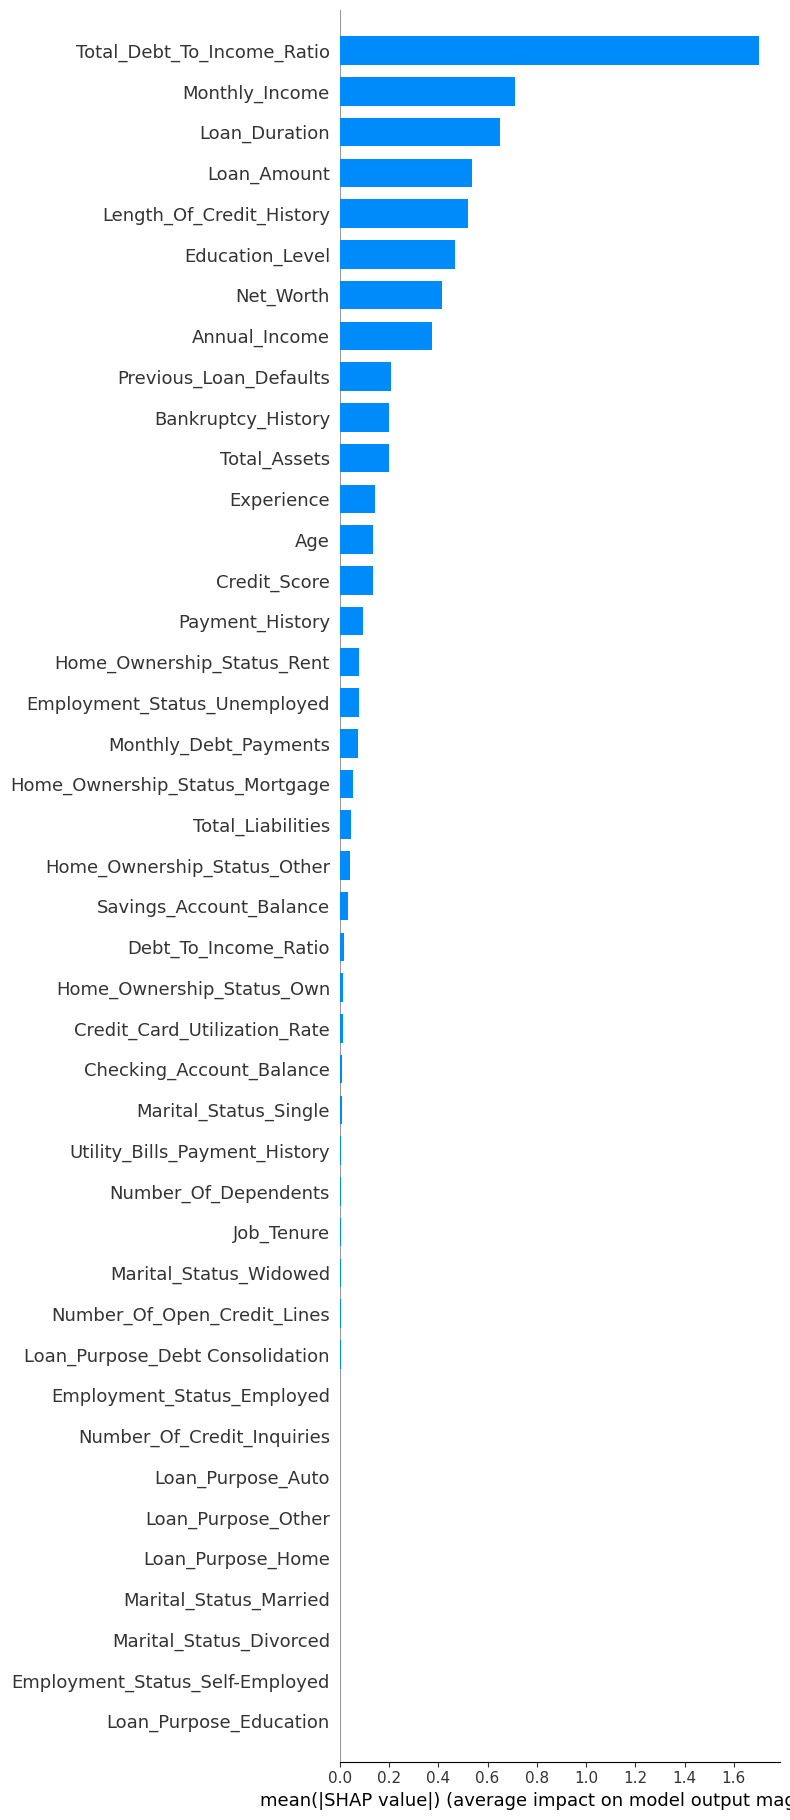

In [330]:
# summary plot - feature importance
shap.summary_plot(xgb_shap_values, X_test, plot_type="bar", max_display=len(X_test.columns))

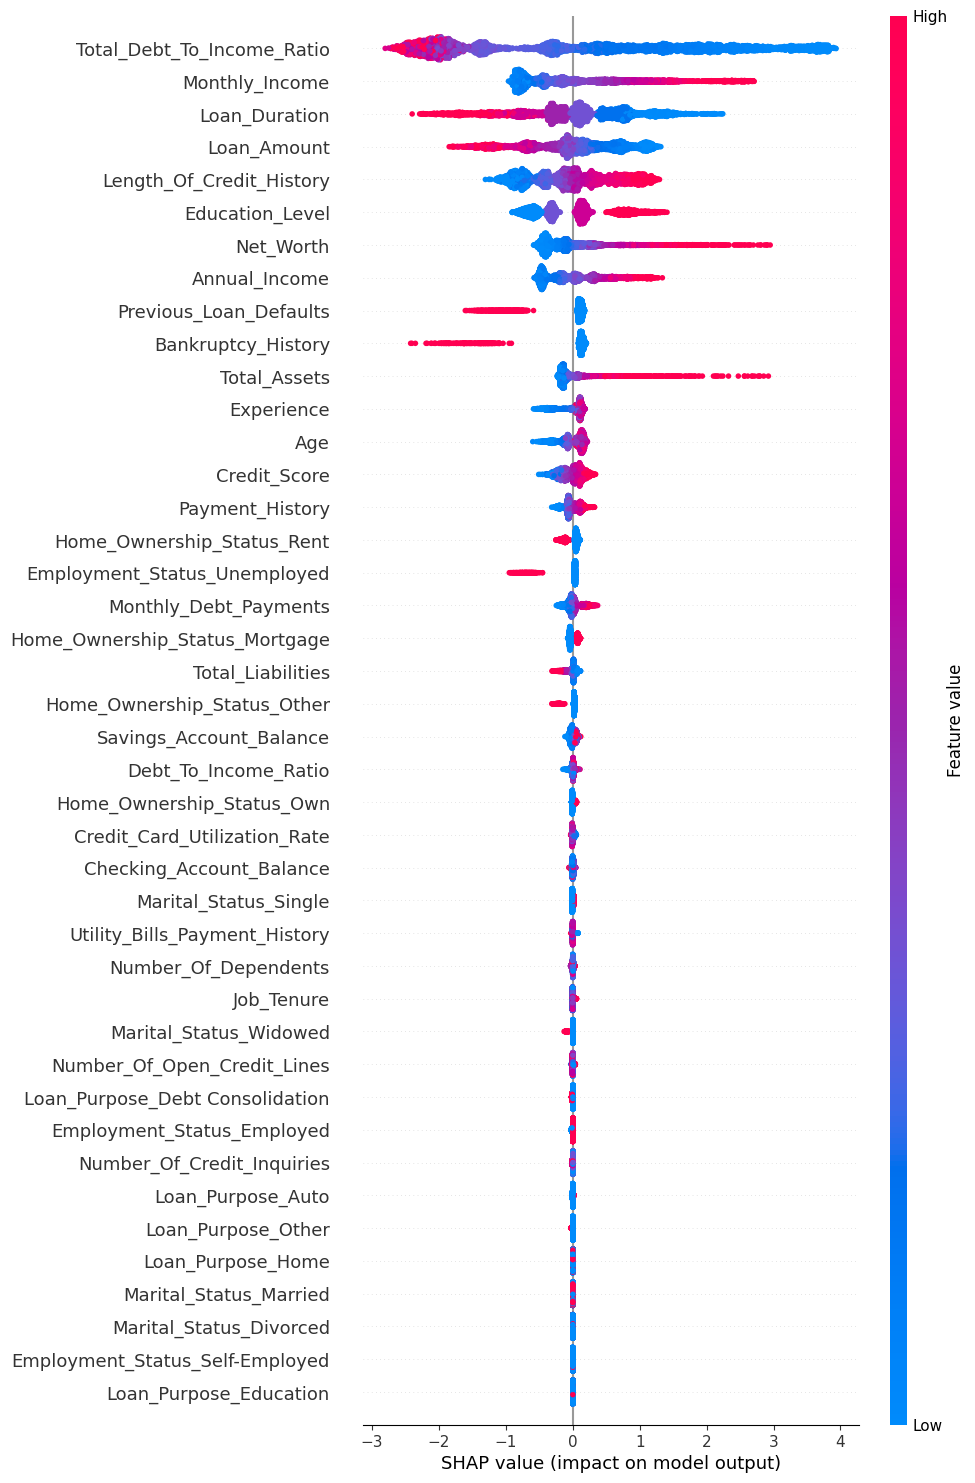

In [335]:
# summary plot - beeswarm
shap.plots.beeswarm(xgb_shap_explanation, max_display=len(X_test.columns), show=True)

### Local Explanation

In [336]:
i = 0  # Index of the instance to visualize

# Use the control variable instead of hardcoded index
instance = X_test.iloc[i:i+1]
instance_shap_values = xgb_explainer.shap_values(instance)

Predicted value = 1.00
Actual value = 1.00


<Figure size 1400x1400 with 0 Axes>

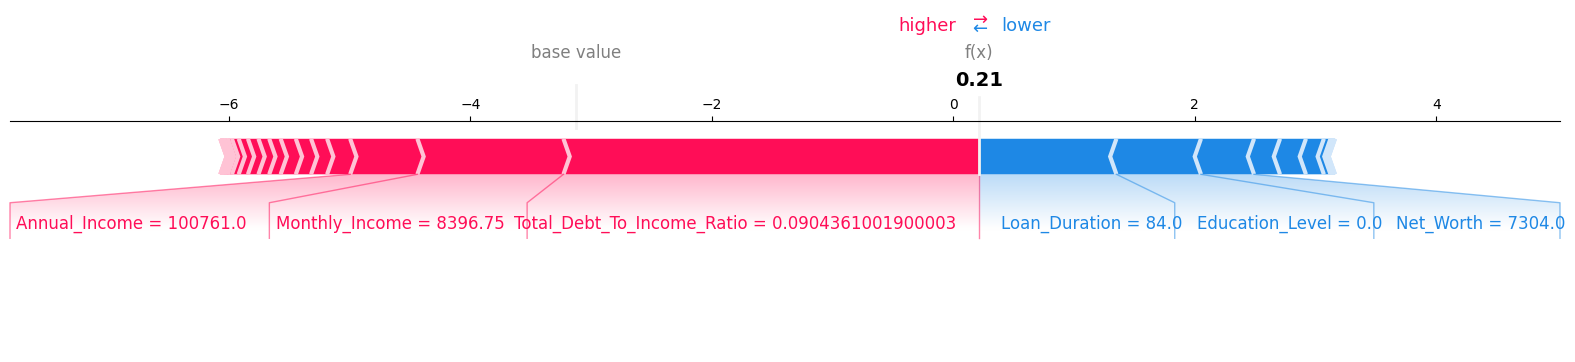

In [337]:
## FORCE PLOT (for the first instance in the test set)

# Initialize JavaScript Visualization
shap.initjs()

# Create force plot
print(f"Predicted value = {xgb.predict(X_test.iloc[i:i+1])[0]:.2f}")
print(f"Actual value = {y_test.iloc[i]:.2f}")


# Create and display force plot directly
force_plot = shap.force_plot(xgb_expected_value,
                            instance_shap_values,
                            instance,
                            feature_names=X_test.columns)

# Force Plot for the first instance in the test set
plt.figure(figsize=(14, 14))
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[i], X_test.iloc[i], matplotlib=True)
plt.show()



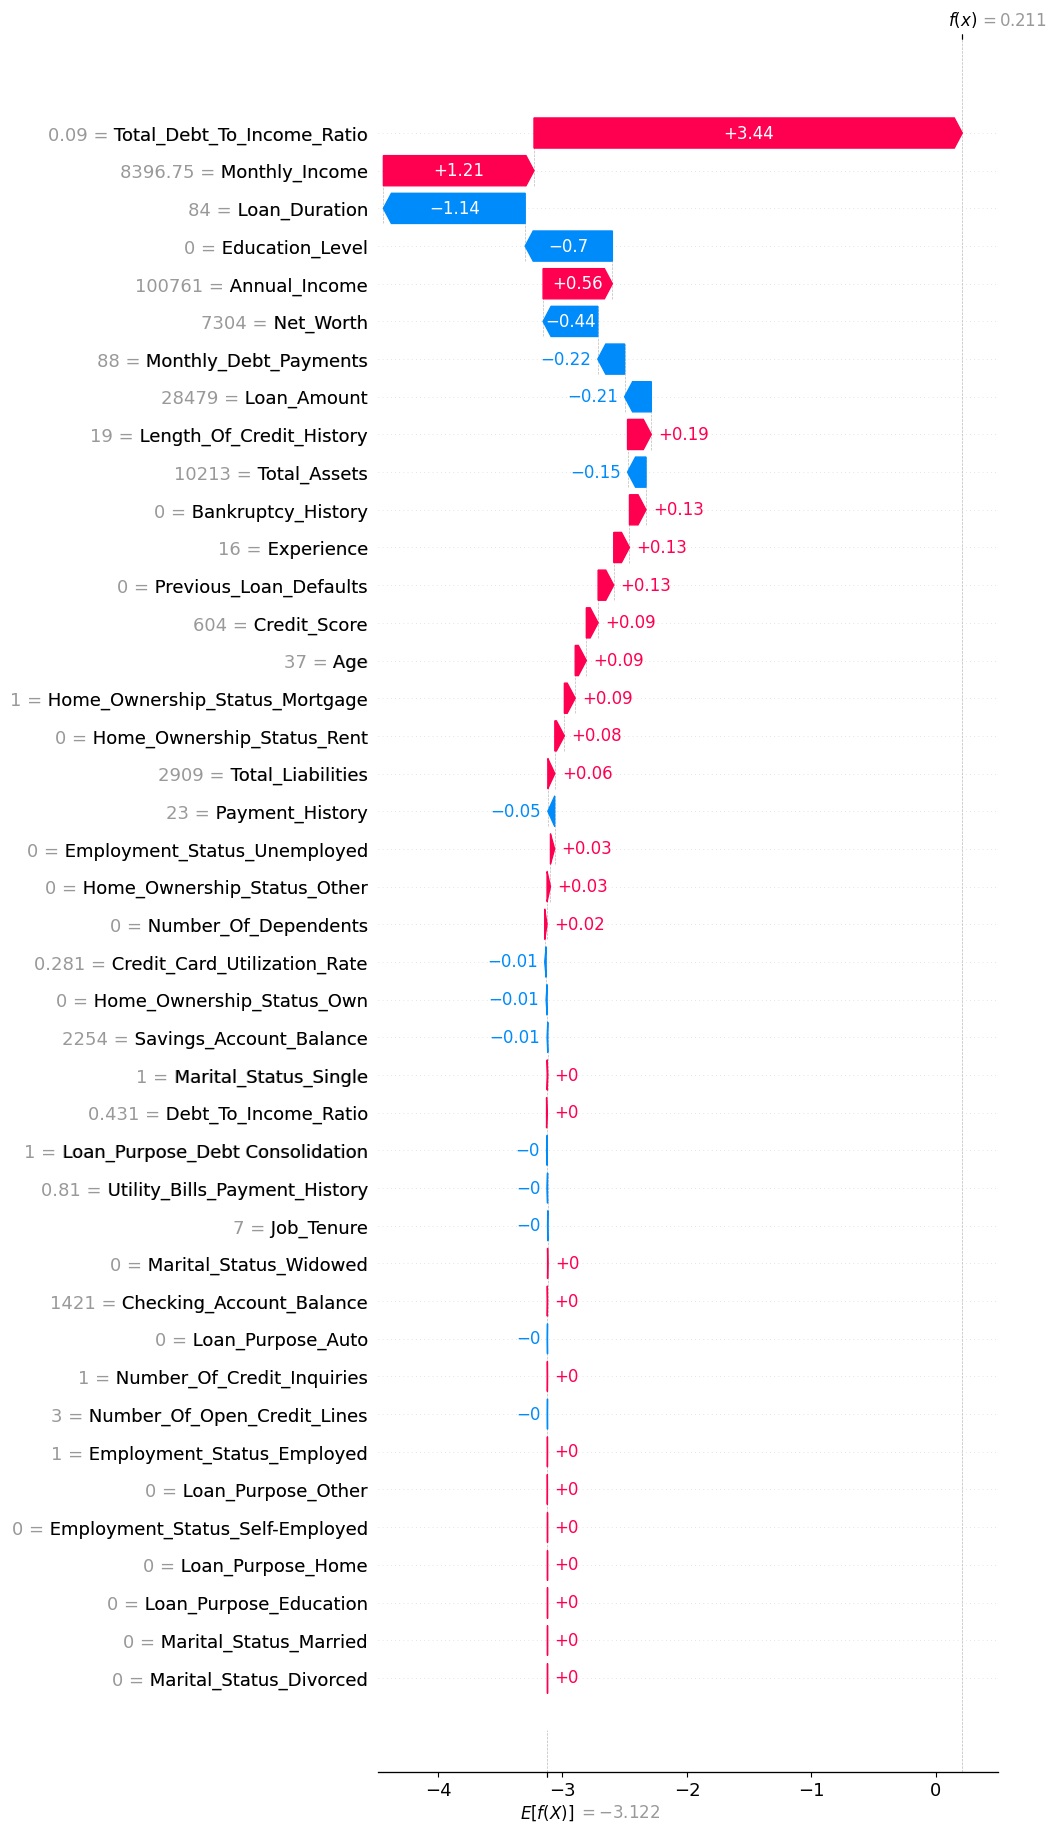

In [338]:
# Waterfall Plot for detailed feature contribution

plt.figure(figsize=(12, 8))
shap.plots.waterfall(shap.Explanation(
    values=instance_shap_values[0],  # Extract the first row of SHAP values
    base_values=xgb_expected_value,
    data=instance.values[0],  # Also extract the first row of data
    feature_names=X_test.columns.tolist()
),max_display=len(X_test.columns)) # Set to show all features
plt.show()

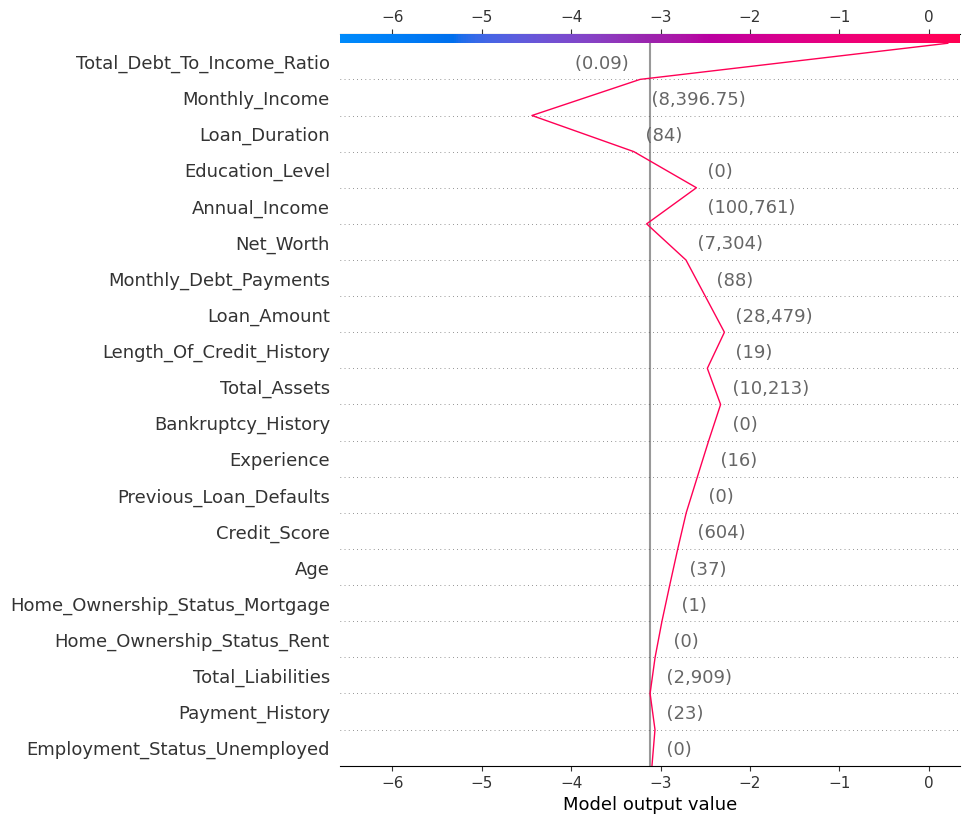

In [350]:
# Decision Plot 

plt.figure(figsize=(12, 8))
shap.decision_plot(xgb_explainer.expected_value, xgb_shap_values[i:i+1,:], X_test.iloc[i:i+1], feature_names=X_test.columns.tolist())
plt.show()

In [359]:
# display the expected_value, shap value, log-odds of the certain instance

base_value = xgb_explainer.expected_value  
total_feature_contributions = instance_shap_values[0].sum()
log_odds = base_value + total_feature_contributions

print(f"LOG-ODDS SPACE: {base_value:.4f} + {total_feature_contributions:.4f} = {log_odds:.4f}")
 

LOG-ODDS SPACE: -3.1216 + 4.3760 = 1.2544


In [ ]:
# Create a human-readable explanation of the SHAP values
i = 0  # Use the same instance index you used earlier
instance = X_test.iloc[i:i+1]
unscaled_instance = X_test.iloc[i:i+1]  # Unscaled instance (for display)
prediction = xgb.predict(instance)[0]  
baseline = xgb_explainer.expected_value  
shap_sum = instance_shap_values[0].sum()

# Calculate log-odds and probability
log_odds = baseline + shap_sum
probability = 1 / (1 + np.exp(-log_odds))

print(f"\n=== HUMAN-READABLE EXPLANATION ===")
print(f"For loan application #{i}, the model predicts: {prediction:.0f} (Approved)" if prediction == 1 
      else f"For loan application #{i}, the model predicts: {prediction:.0f} (Rejected)")

print(f"\n1. UNDERSTANDING THE THREE PREDICTION SPACES:")
print(f"   • LOG-ODDS SPACE: {baseline:.4f} + {shap_sum:.4f} = {log_odds:.4f}")
print(f"   • PROBABILITY SPACE: 1/(1+e^-{log_odds:.4f}) = {probability:.4f} or {probability*100:.1f}%")
print(f"   • BINARY DECISION: {probability:.4f} > 0.5, therefore prediction = {prediction:.0f}")

print(f"\n2. TOP FEATURES INFLUENCING THIS DECISION:")
# Sort features by absolute impact for clearer interpretation
impacts = pd.DataFrame({
    'Feature': X_test.columns,
    'Impact': instance_shap_values[0],
    'Value': unscaled_instance.values[0]
})
# Sort by absolute impact but keep original signs
impacts = impacts.sort_values(by='Impact', key=abs, ascending=False)

# Print top contributing features
for _, row in impacts.iterrows():  # Show top 10 features
    feature = row['Feature']
    value = row['Value']
    impact = row['Impact']

    if impact > 0:
        print(f"   ↑ {feature} ({value:.2f}) increases approval chance by {impact:.4f}")
    else:
        print(f"   ↓ {feature} ({value:.2f}) decreases approval chance by {abs(impact):.4f}")


=== HUMAN-READABLE EXPLANATION ===
For loan application #0, the model predicts: 1 (Approved)

1. UNDERSTANDING THE THREE PREDICTION SPACES:


TypeError: unsupported format string passed to numpy.ndarray.__format__

## Catboost

In [361]:
cbexplainer = shap.TreeExplainer(tuned_lgbm, X_train)
cbshap_values = cbexplainer.shap_values(X_test)
cbexpected_values = cbexplainer.expected_value

 99%|===================| 3957/4000 [00:20<00:00]        

In [362]:
# Create a proper SHAP Explanation object
cb_shap_explanation = shap.Explanation(
    values=cbshap_values,
    base_values=cbexplainer.expected_value,
    data=X_test.values,
    feature_names=X_test.columns.tolist()
)

### Global Explanation

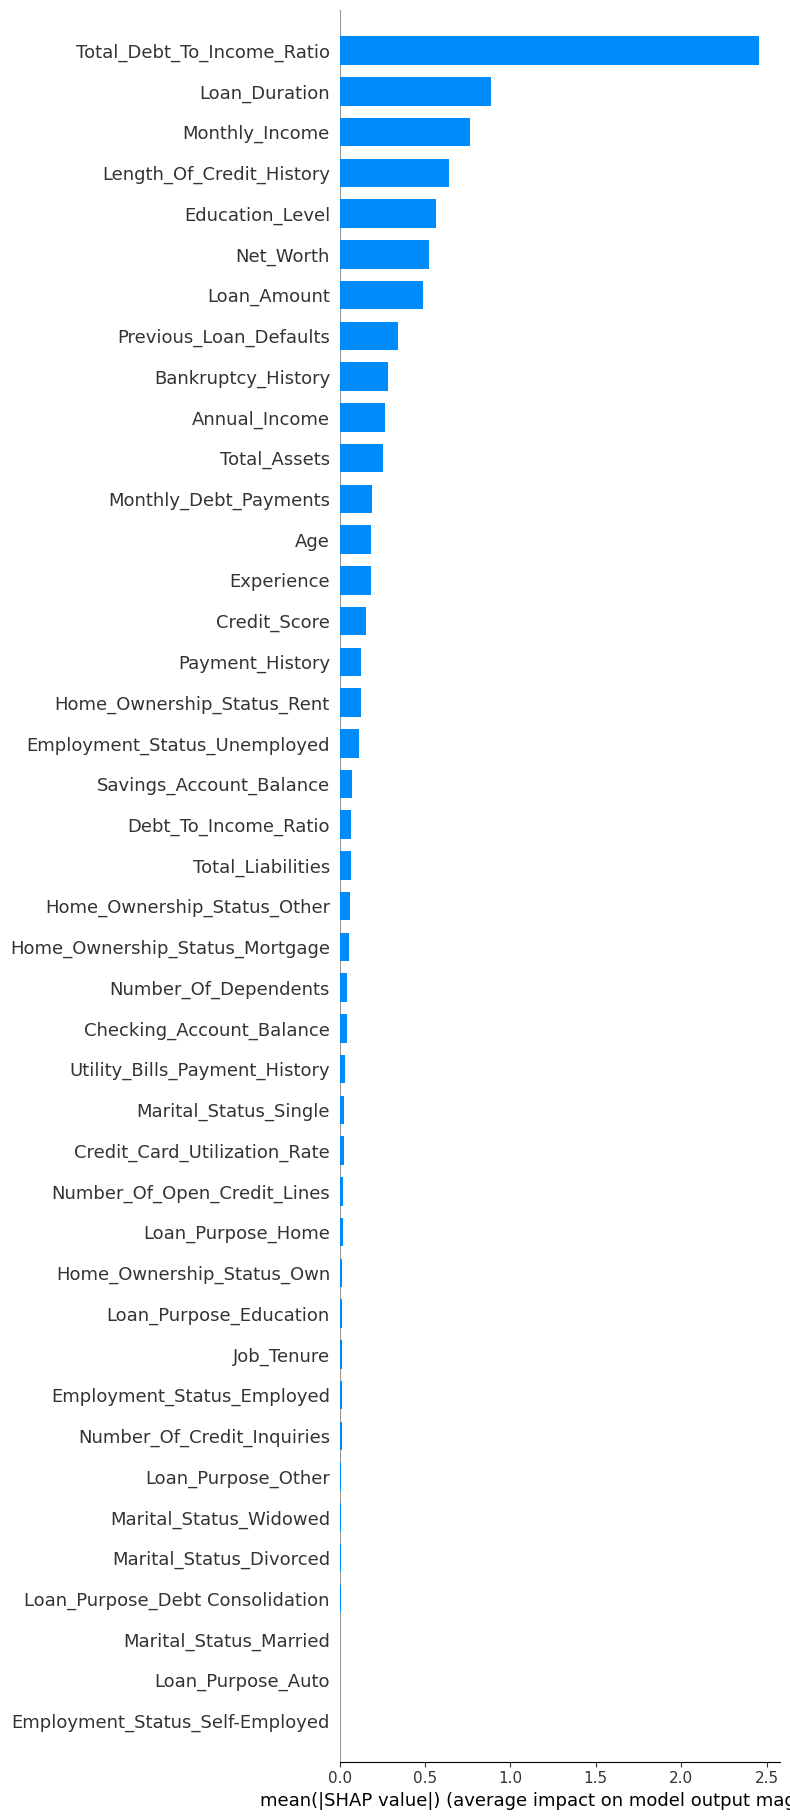

In [363]:
# plot a summary plot of the shap values
shap.summary_plot(cbshap_values, X_test, plot_type="bar", max_display=len(X_test.columns), show=True)

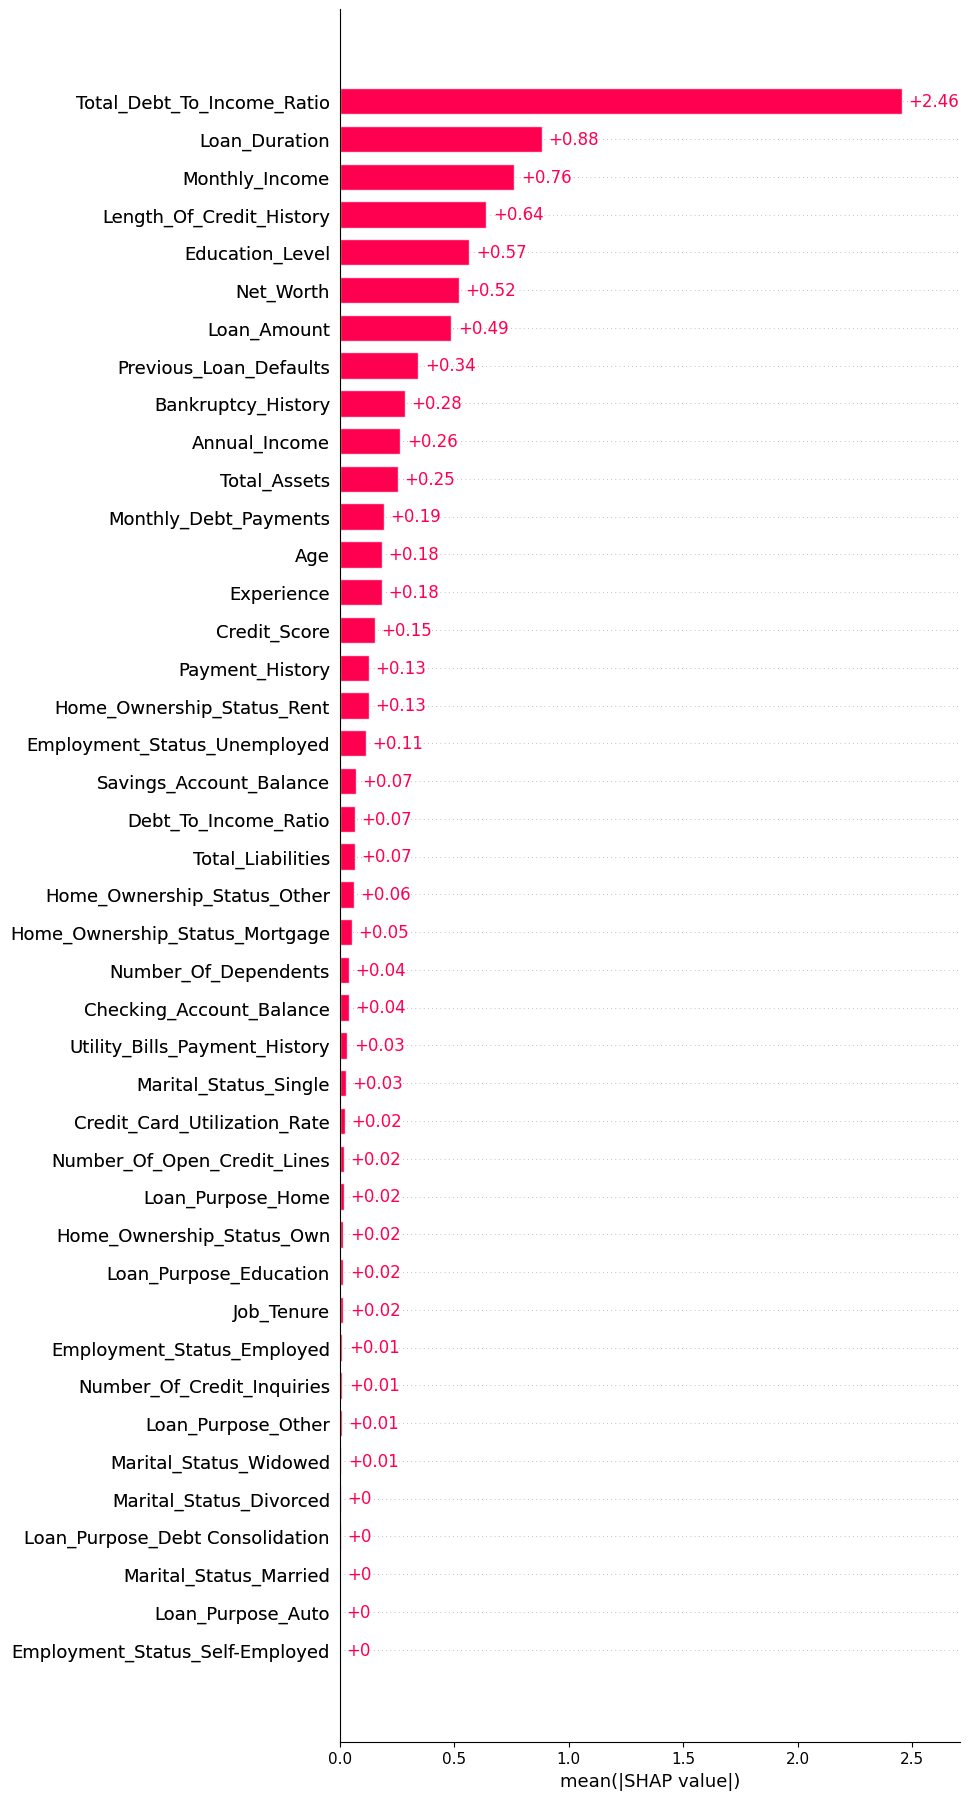

In [364]:
shap.plots.bar(cb_shap_explanation,max_display=len(X_test.columns), show=True)

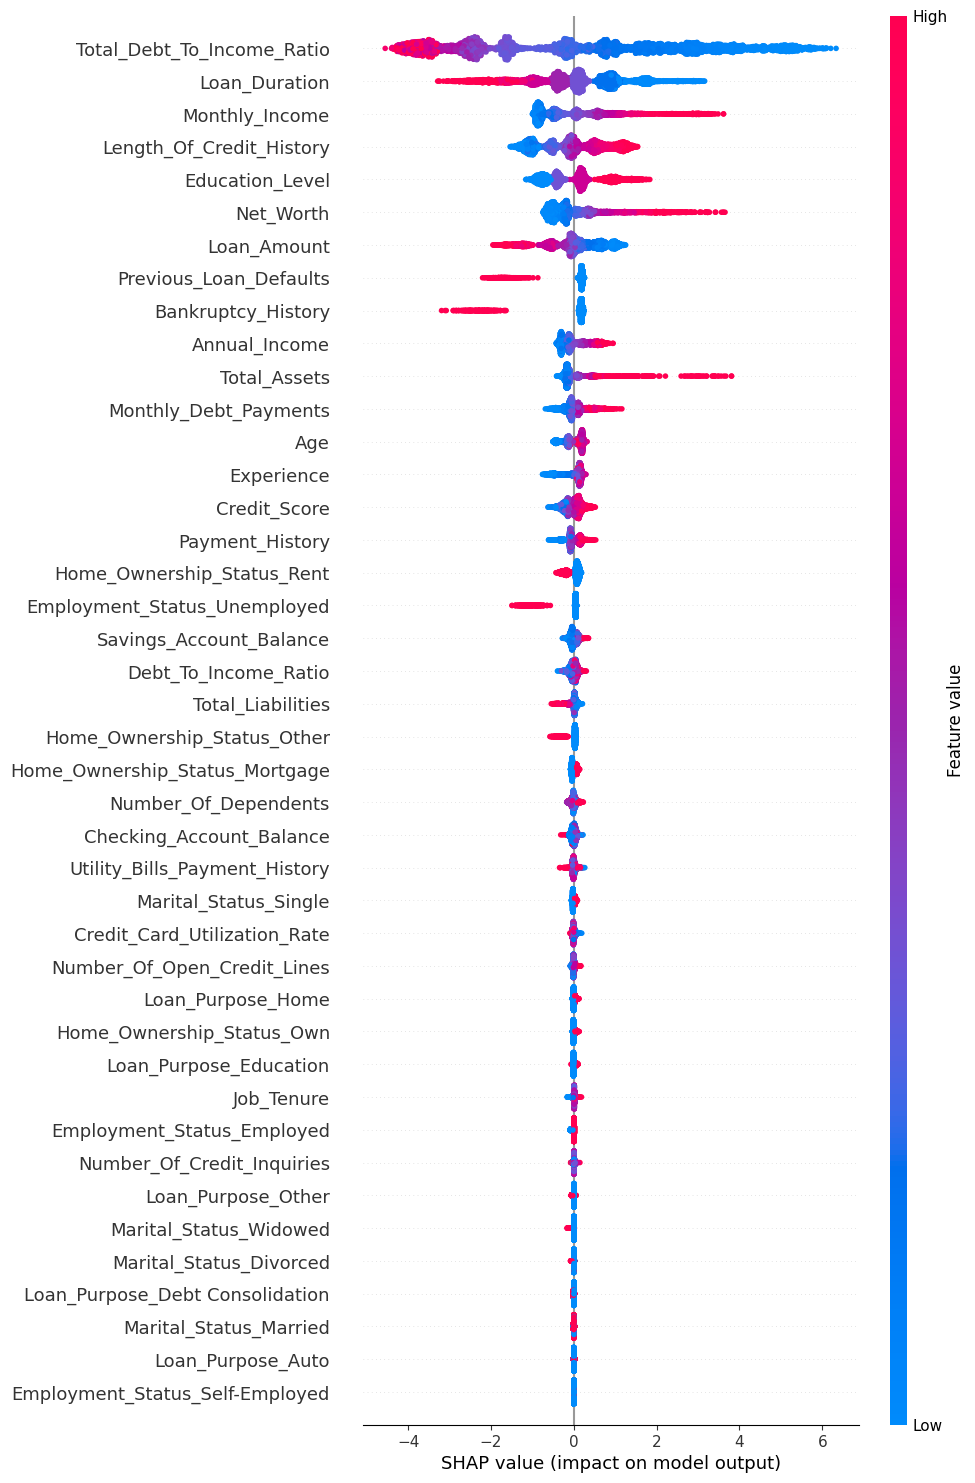

In [365]:
# beeswarm plot of the shap values
shap.plots.beeswarm(cb_shap_explanation, max_display=len(X_test.columns), show=True)

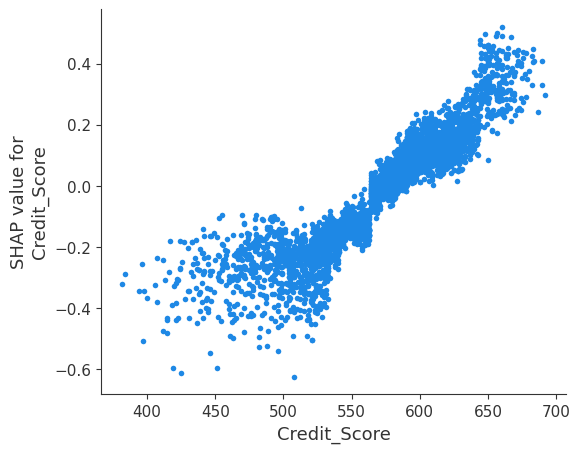

In [366]:
# Dependence Plot for a specific feature
feature_name = 'Credit_Score' 
shap.dependence_plot(feature_name, cbshap_values, X_test, interaction_index=None, show=True)


### Local Explanation

In [367]:
i = 0  # Index of the instance to visualize

# Use the control variable instead of hardcoded index
instance = X_test.iloc[i:i+1]
instance_shap_values = cbexplainer.shap_values(instance)

Predicted value = 1.00


<Figure size 1400x1400 with 0 Axes>

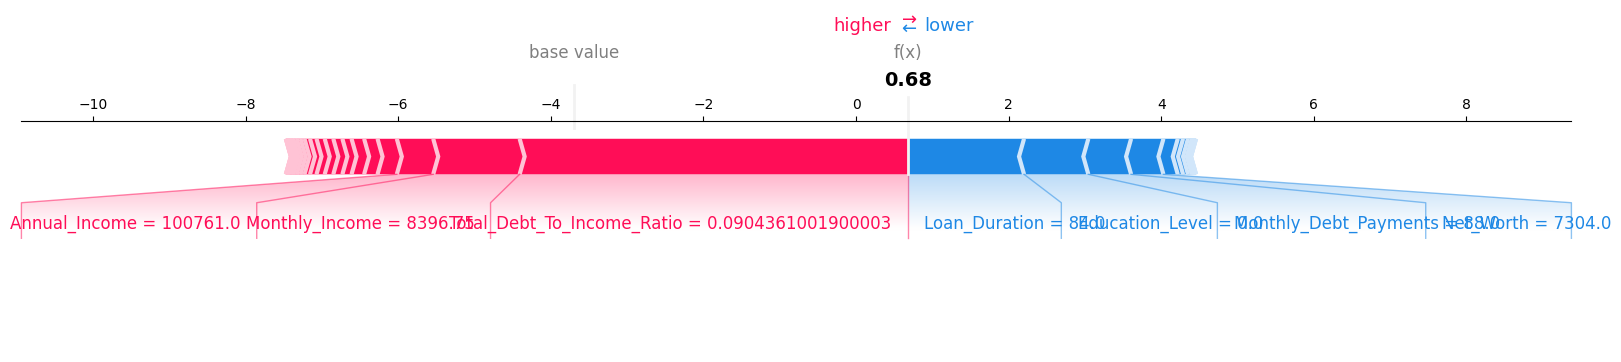

In [368]:
## FORCE PLOT (for the first instance in the test set)

# Initialize JavaScript Visualization
shap.initjs()

# Create force plot
print(f"Predicted value = {xgb.predict(X_test.iloc[i:i+1])[0]:.2f}")


# Create and display force plot directly
force_plot = shap.force_plot(cbexpected_values,
                            instance_shap_values,
                            instance,
                            feature_names=X_test.columns)

# Force Plot for the first instance in the test set
plt.figure(figsize=(14, 14))
shap.force_plot(cbexplainer.expected_value, cbshap_values[i], X_test.iloc[i], matplotlib=True)
plt.show()

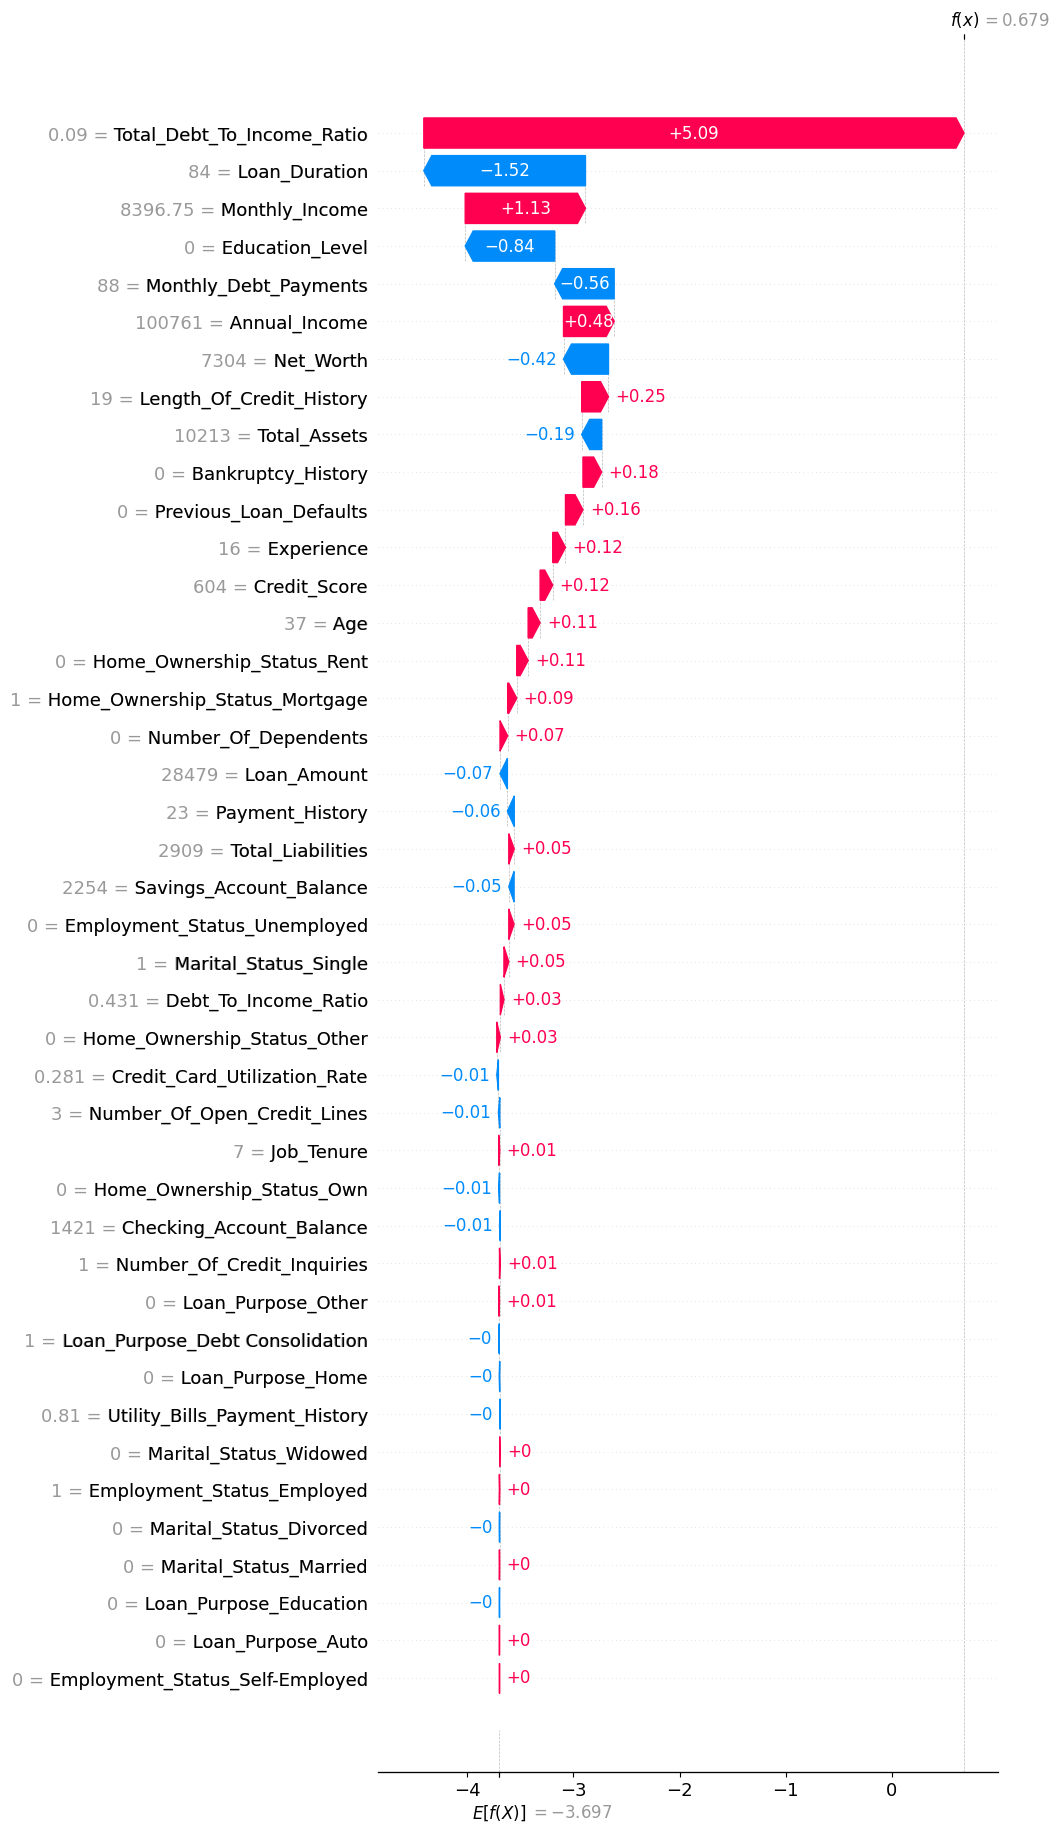

In [369]:
# Waterfall Plot for detailed feature contribution

plt.figure(figsize=(12, 8))
shap.plots.waterfall(shap.Explanation(
    values=instance_shap_values[0],  # Extract the first row of SHAP values
    base_values=cbexpected_values,
    data=instance.values[0],  # Also extract the first row of data
    feature_names=X_test.columns.tolist()
),max_display=len(X_test.columns)) # Set to show all features
plt.show()

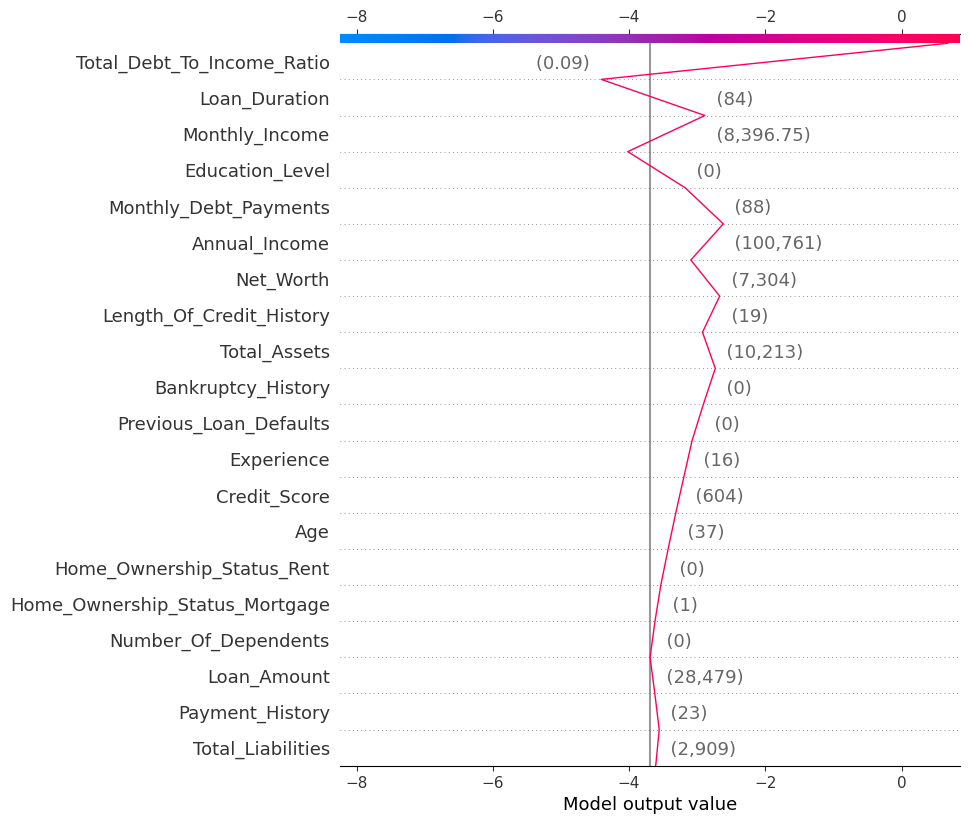

In [370]:
## Decision Plot for the first instance in the test set
# Decision Plot for the first instance in the test set
plt.figure(figsize=(12, 8))
shap.decision_plot(cbexplainer.expected_value, cbshap_values[i:i+1,:], X_test.iloc[i:i+1], feature_names=X_test.columns.tolist())
plt.show()

# Model Serialization 

In [160]:
# Save the model

joblib.dump(tuned_xgb, 'xgb.pkl')
joblib.dump(tuned_catboost, 'catboost.pkl')
joblib.dump(tuned_lgbm, 'lgbm.pkl')

['lgbm.pkl']

In [ ]:
numerical_cols = ['Age', 'Annual_Income', 'Credit_Score', 'Experience', 'Loan_Amount', 'Loan_Duration', 'Number_Of_Dependents', 
                  'Monthly_Debt_Payments', 'Credit_Card_Utilization_Rate', 'Number_Of_Open_Credit_Lines', 'Number_Of_Credit_Inquiries', 
                  'Debt_To_Income_Ratio', 'Payment_History', 'Length_Of_Credit_History', 'Savings_Account_Balance', 
                  'Checking_Account_Balance', 'Total_Assets', 'Total_Liabilities', 'Monthly_Income', 'Utility_Bills_Payment_History', 
                  'Job_Tenure', 'Net_Worth', 'Total_Debt_To_Income_Ratio']
binary_cols = ['Bankruptcy_History', 'Previous_Loan_Defaults']
onehot_cols = ['Employment_Status', 'Marital_Status', 'Home_Ownership_Status', 'Loan_Purpose']
ordinal_cols = ['Education_Level']
target_col = ['Loan_Approved']

In [161]:
# save the preprocessor
joblib.dump(scaler, 'standard_scaler.pkl')

joblib.dump(onehot_encoder, 'onehot_encoder.pkl')

joblib.dump(ordinal_encoder, 'ordinal_encoder.pkl')

# Save column names for consistency
preprocessing_metadata = {
    'numerical_columns': numerical_cols,
    'binary_columns': binary_cols,
    'onehot_encoding_columns': onehot_cols,
    'ordinal_encoding_columns': ordinal_cols,
    'feature_names': X_train.columns.tolist(),
}
joblib.dump(preprocessing_metadata, 'preprocessing_metadata.pkl')

# save the training data
joblib.dump(X_train, 'X_train.pkl')


['X_train.pkl']

# Imbalanced Data Handling - SMOTE

In [ ]:
print(y_train.value_counts(normalize=True))

Loan_Approved
0    0.764813
1    0.235187
Name: proportion, dtype: float64


In [ ]:
# apply smote
smote = SMOTE(random_state=42, sampling_strategy='minority')

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

<Axes: xlabel='Loan_Approved', ylabel='count'>

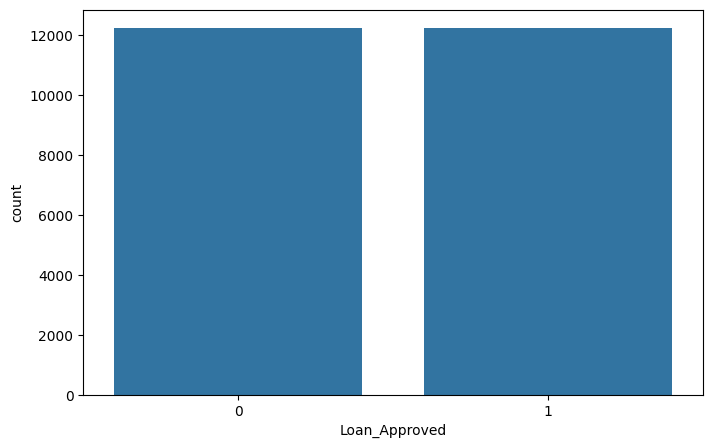

In [ ]:
# visualize the distribution of the target variable after applying SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_res, order=y_train_res.value_counts().index)

In [ ]:
X_train_res.isnull().sum()

Age                                0
Annual_Income                      0
Credit_Score                       0
Experience                         0
Loan_Amount                        0
Loan_Duration                      0
Number_Of_Dependents               0
Monthly_Debt_Payments              0
Credit_Card_Utilization_Rate       0
Number_Of_Open_Credit_Lines        0
Number_Of_Credit_Inquiries         0
Debt_To_Income_Ratio               0
Bankruptcy_History                 0
Previous_Loan_Defaults             0
Payment_History                    0
Length_Of_Credit_History           0
Savings_Account_Balance            0
Checking_Account_Balance           0
Total_Assets                       0
Total_Liabilities                  0
Monthly_Income                     0
Utility_Bills_Payment_History      0
Job_Tenure                         0
Net_Worth                          0
Total_Debt_To_Income_Ratio         0
Employment_Status_Employed         0
Employment_Status_Self-Employed    0
E

In [ ]:
"""
lr_params = {
    'C': uniform(0.01, 9.99),                      # Inverse regularization: 0.01-10
    'penalty': ['l2', 'l1', 'elasticnet', None],   # Regularization type
    'solver': ['lbfgs', 'liblinear', 'saga'],      # Solver (ensure compatible with penalty)
    'max_iter': [100, 200, 300, 500],              # Max iterations
    'fit_intercept': [True, False]
}

# Perform RandomizedSearchCV
tuned_lr, lr_best_params = randomsearch_tune(lr, lr_params, X_train, y_train)

print("Best Parameters for Logistic Regression:")
print(lr_best_params)

# Make predictions
tunedlr_y_pred = tuned_lr.predict(X_test)
"""

"""
Best Parameters for LightGBM Classifier:
{'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 1, 'num_leaves': 80, 'n_estimators': 300, 'min_child_weight': 5, 'min_child_samples': 20, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

Best Parameters for CatBoost Classifier:
{'subsample': 1.0, 'rsm': 0.9, 'random_strength': 1e-09, 'n_estimators': 500, 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'grow_policy': 'SymmetricTree', 'depth': 4, 'border_count': 32, 'bagging_temperature': 1}

Best Parameters for XGBoost Classifier:
{'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 2, 'n_estimators': 400, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.9}

"""